# The Battle of Neighbourhoods

![Image](https:www.tupiniquimhostel.com.br/wp/wp-content/uploads/2016/11/Cristo-Redentor-800x250.jpg)

## A study of the Rio de Janeiro City Brazilian Restaurants.

## Table of Content

* [1. Introduction](#chapter1)
    * [1.1 Purpose](#section_1_1)
    * [1.2 Environment](#section_1_2)
    * [1.3 Problem Description](#section_1_3)
    * [1.4 Stakeholders](#section_1_4)
* [2. Data](#chapter2)
    * [2.1 Data Sources](#section_2_1)
        * [2.1.1 Libraries and necessary dependencies](#section_2_1_1)
        * [2.1.2 Rio de Janeiro Neighbourhood Data](#section_2_1_2)
        * [2.1.3 Rio de Janeiro Population Data](#section_2_1_3)
        * [2.1.4 Rio de Janeiro Foursquare Data](#section_2_1_4)
        * [2.1.5 Methodology](#section_2_1_5)
    * [2.2 Data Exploration](#section_2_2)
        * [2.2.1 Neighbourhood Data Exploration](#section_2_2_1)
        * [2.2.2 Population Data Exploration](#section_2_2_2)
        * [2.2.3 Create the final Data Frame "RioNeighbourhoodData"](#section_2_2_3)
        * [2.2.4 Explore Rio de Janeiro Neighbourhoods](#section_2_2_4)
        * [2.2.5 Explore Rio de Janeiro City Neighbourhoods](#section_2_2_5)
        * [2.2.6 Explore Rio de Janeiro City Neighbourhoods with Foursquare](#section_2_2_6)
    * [2.3 k-means Clustering of Rio de Janeiro City Neighbourhood Restaurants](#section_2_3)
        * [2.3.1 Run k-means](#section_2_3_1)
        * [2.3.2 KElbowVisualizer (The Silhouette Metric)](#section_2_3_2)
        * [2.3.3 KElbowVisualizer (The Calinski Harabaz Metric)](#section_2_3_3)
        * [2.3.4 The top 10 most common restaurants for each Rio de Janeiro City Neighbourhood](#section_2_3_4)
        * [2.3.5 Visualize the resulting Rio de Janeiro City Clusters](#section_2_3_5)
        * [2.3.6 Examine the Rio de Janeiro City Clusters](#section_2_3_6)
    * [2.4 Rio de Janeiro City Neighbourhood Restaurants Exploration Results](#section_2_4)
        * [2.4.1 Neighbourhood Restaurant Summary](#section_2_4_1)
        * [2.4.2 Restaurant Type per Neighbourhood](#section_2_4_2)
        * [2.4.3 Brazilian Restaurants per Neighbourhood ](#section_2_4_3)
        * [2.4.4 Brazilian Restaurants per Neighbourhood per 1000 habitants](#section_2_4_4)
        * [2.4.5 Brazilian Speciality Restaurants per Neighbourhood](#section_2_4_5)
        * [2.4.6 ](#section_2_4_6)
        

## 1. Introduction <a class='anchor' id='chapter1'></a>

### 1.1 Purpose <a class = 'anchor' id = 'section_1_1'></a>
>This Jupyter notebook is part of Course Assignment for the IBM Data Science Professional Certificate.

### 1.2 Environment <a class = 'anchor' id = 'section_1_2'></a>
>Rio de Janeiro is the second most populous municipality in Brazil with a population of 6.72 million people according to the 2019 statistics. There are 16 Boroughs and 163 Neighbourhoods in Rio de Janeiro. It is the capital of the state of Rio de Janeiro and has headquarters to Brazilian oil mining and telecomunication companies. Rio de Janeiro is one of the most visitered cities in the South America and it know for the "Christ the Redeemer" statue, the "Sugarloaf Mountain. Carnaval, Samba, Bossa Nova and the beaches. An other interesting thing is the number of bars and restaurants with tastes from all over the world. We are going to, in this study, have a special look at the Brazilian restaurants that many different catagories.  https://en.wikipedia.org/wiki/Rio_de_Janeiro.
>   
>We are going to explore Brazilian Restaurants in two Boroughs. The South Zone (Zona Sul), https://en.wikipedia.org/wiki/Rio_de_Janeiro#South_Zone , and the Central Zone (Centro), https://en.wikipedia.org/wiki/Rio_de_Janeiro#Central_Zone. These two Boroughs have together 32 neighbourhoods that are common for the stakeholders involved in this study.

### 1.3 Problem Description <a class = 'anchor' id = 'section_1_3'></a>
<blockquote> The big challenge for an restaurant invester is to know where to invest in a particular restaurant category is to know where to place it to see where you may have less concurrence. For a tourist, with the taste for restaurants of the visited country, the wish is to find the best spot or area. We are going to help them by using some Data Science techniques.
</blockquote>

### 1.4 Stakeholders <a class = 'anchor' id = 'section_1_4'></a>
> The people who would be interested in this study will be investers in the Brazilian Restaurant Business but also turists who would like to know were and what kind of kind of Brazilian restaurants that are available in different neighbourhoods in city  of Rio de Janeiro.

## 2. Data <a class = 'anchor' id ='chapter2'></a>

### 2.1 Data Sources <a class = 'anchor' id = 'section_2_1'></a>
>To make the Brazilian Restaurant study we will need following data of Rio de Janeiro:
>* Neighbourhood Data
>* Population Data
>* Brazilian Restaurant Venues   

#### 2.1.1 Libraries and necessary dependencies <a class = 'anchor' id = 'section_2_1_1'></a>

>Following Libraries will be needed for exploring the Neighbourhood data in Rio de Janeiro:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# For Numpy and Pandas Handling
import numpy as np
import pandas as pd

# For Geopandas handling
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
import geopandas as gpd
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopandas import GeoSeries
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

# Geoviews handling
#pip install geoviews

# To handle JSON files and requests
import requests
import json

# For plot handling
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# For K-means from clustering handling
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# For map handling
#!conda install -c conda-forge folium=0.5.0 --yes # Uncomment if not yet installed
import folium

print('Dependencies downloaded')

Dependencies downloaded


#### 2.1.2 Rio de Janeiro Neighbourhood Data <a class = 'anchor' id = 'section_2_1_2'></a>

> The Data for the 'Neighbourhood' will come from the open source portal: www.data.rio
>
> The Dataset will be downloaded from www.data.rio/datasets/limite-de-bairros/data?geometry=-44.357%2C-23.138%2C-42.533%2C-22.695 
as following GeoJSON file: https://opendata.arcgis.com/datasets/dc94b29fc3594a5bb4d297bee0c9a3f2_15.geojson

##### 2.1.2.1 The Dataset for the Neighbourhoods

In [2]:
RioNeighbourhoodUrl = 'https://opendata.arcgis.com/datasets/dc94b29fc3594a5bb4d297bee0c9a3f2_15.geojson'

In [3]:
RioNeighbourhoodFeatures = requests.get(RioNeighbourhoodUrl).json()

In [4]:
RioNeighbourhoodData = gpd.GeoDataFrame.from_file(RioNeighbourhoodUrl)
RioNeighbourhoodData.head()

OBJECTID          Área                        NOME  \
0       325  1.705685e+06  Paquetá                      
1       326  4.056403e+06  Freguesia (Ilha)             
2       327  9.780465e+05  Bancários                    
3       328  1.895742e+07  Galeão                       
4       329  1.672546e+06  Tauá                         

                 REGIAO_ADM AREA_PLANE CODBAIRRO  CODRA  CODBNUM  \
0  PAQUETA                           1       013     21       13   
1  ILHA DO GOVERNADOR                3       098     20       98   
2  ILHA DO GOVERNADOR                3       097     20       97   
3  ILHA DO GOVERNADOR                3       104     20      104   
4  ILHA DO GOVERNADOR                3       101     20      101   

                                                LINK                  RP  \
0  Paqueta&area=013                              ...              Centro   
1  Freguesia (Ilha)          &area=98            ...  Ilha do Governador   
2  Bancários                 &area=97            ...  Ilha do Governador   
3  Galeão                    &area=104           ...  Ilha do Governador   
4  Tauá                      &area=101           ...  Ilha do Governador   

  Cod_RP  CODBAIRRO_LONG   SHAPESTArea  SHAPESTLength  \
0    1.1              13  1.705685e+06   24841.426669   
1    3.7              98  4.056403e+06   18303.595717   
2    3.7              97  9.780465e+05    7758.781282   
3    3.7             104  1.895742e+07   21510.059220   
4    3.7             101  1.672546e+06    8246.109606   

                                            geometry  
0  MULTIPOLYGON (((-43.10567 -22.74888, -43.10568...  
1  MULTIPOLYGON (((-43.17170 -22.77661, -43.17170...  
2  MULTIPOLYGON (((-43.18915 -22.78318, -43.18915...  
3  MULTIPOLYGON (((-43.22804 -22.78374, -43.22811...  
4  POLYGON ((-43.18039 -22.79940, -43.18022 -22.7...

>We can observe that downloaded Neighbourhood Data has more columns than we need for analysis and the columns that will be used needs to be renamed for better understanding.
>The only columns needed are following:
>* 'RP' which will be named 'Borough'
>* 'NOME' which will be named 'Neighbourhood'
>* 'geometry' which is the polygon data of the Neighbourhood

##### 2.1.2.2 Drop, rename and reorder Columns

In [5]:
RioNeighbourhoodDataReduced = RioNeighbourhoodData.copy()
RioNeighbourhoodDataReduced.drop(columns = ['OBJECTID', 'Área', 'REGIAO_ADM', 'AREA_PLANE', 'CODBAIRRO', 'CODRA', 'CODBNUM', 'LINK','Cod_RP','CODBAIRRO_LONG','SHAPESTArea','SHAPESTLength'], inplace = True)
RioNeighbourhoodDataReduced.rename(columns = {'NOME': 'Neighbourhood', 'RP': 'Borough'}, inplace = True)
RioNeighbourhoodDataReduced = RioNeighbourhoodDataReduced[['Borough','Neighbourhood','geometry']]
RioNeighbourhoodDataReduced.head()

Borough               Neighbourhood  \
0              Centro  Paquetá                      
1  Ilha do Governador  Freguesia (Ilha)             
2  Ilha do Governador  Bancários                    
3  Ilha do Governador  Galeão                       
4  Ilha do Governador  Tauá                         

                                            geometry  
0  MULTIPOLYGON (((-43.10567 -22.74888, -43.10568...  
1  MULTIPOLYGON (((-43.17170 -22.77661, -43.17170...  
2  MULTIPOLYGON (((-43.18915 -22.78318, -43.18915...  
3  MULTIPOLYGON (((-43.22804 -22.78374, -43.22811...  
4  POLYGON ((-43.18039 -22.79940, -43.18022 -22.7...

>This is the Neighbourhood Dataset that we will performe Data Wrangling and explore more

#### 2.1.3 Rio de Janeiro Population Data <a class = 'anchor' id = 'section_2_1_3'></a>

>The Data for the neighbourhood 'Population' numbers will come from the govermental site IBGE (Brazilian Institute of Geography and Statistics): https://www.ibge.gov.br
>
>The Dataset will be constructed and downloaded from https://sidra.ibge.gov.br/Tabela/3175
as following csv file:https://sidra.ibge.gov.br/geratabela?format=us.csv&name=tabela3175.csv&terr=NS&rank=-&query=t/3175/n102/all/v/allxp/p/all/c86/0/c1/0/c2/0/c287/0/l/v,p%2Bc86%2Bc1,t%2Bc2%2Bc287&measurescol=true

##### 2.1.3.1 The Dataset for the population

In [6]:
BrazilPopulationPerNeighbourhoodUrl = 'https://sidra.ibge.gov.br/geratabela?format=us.csv&name=tabela3175.csv&terr=NS&rank=-&query=t/3175/n102/all/v/allxp/p/all/c86/0/c1/0/c2/0/c287/0/l/v,p%2Bc86%2Bc1,t%2Bc2%2Bc287&measurescol=true'

In [7]:
BrazilPopulationPerNeighbourhoodData = pd.read_csv(BrazilPopulationPerNeighbourhoodUrl,skiprows = 5)

In [8]:
BrazilPopulationPerNeighbourhoodData.head()

Nível                                         Bairro   Sexo  Idade Total
0    BA            Centro - Alta Floresta D'Oeste (RO)  Total  Total  1960
1    BA         Liberdade - Alta Floresta D'Oeste (RO)  Total  Total  1075
2    BA       Cidade Alta - Alta Floresta D'Oeste (RO)  Total  Total  1175
3    BA  Santa Felicidade - Alta Floresta D'Oeste (RO)  Total  Total  2833
4    BA   Princesa Isabel - Alta Floresta D'Oeste (RO)  Total  Total  3067

>We can observe that downloaded Population Data has more columns than we need for the analysis and the columns that will be used needs to be renamed for better understanding.
>
>The columns that will be needed for exploration are the following:
>* 'Bairro' which will be named 'NeighbourhoodComposed'
>* 'Total' which wil be named 'Population'

##### 2.1.3.2 Drop and rename Columns

In [9]:
BrazilPopulationPerNeighbourhoodDataReduced = BrazilPopulationPerNeighbourhoodData.copy()
BrazilPopulationPerNeighbourhoodDataReduced.drop(columns = ['Nível','Sexo','Idade'], inplace = True)
BrazilPopulationPerNeighbourhoodDataReduced.rename(columns = {'Bairro': 'NeighbourhoodComposed', 'Total': 'Population'}, inplace = True)
BrazilPopulationPerNeighbourhoodDataReduced.head()

NeighbourhoodComposed Population
0            Centro - Alta Floresta D'Oeste (RO)       1960
1         Liberdade - Alta Floresta D'Oeste (RO)       1075
2       Cidade Alta - Alta Floresta D'Oeste (RO)       1175
3  Santa Felicidade - Alta Floresta D'Oeste (RO)       2833
4   Princesa Isabel - Alta Floresta D'Oeste (RO)       3067

>This is the Population Dataset that we will performe Data Wrangling and explore more

#### 2.1.4 Rio de Janeiro Foursquare Data <a class = 'anchor' id = 'section_2_1_4'></a>
>The Data of Brazilian Restaurants will be derived from the Foursquare location platform, https://developer.foursquare.com
>
>To limit the types of venues, we will use the "Brazilian Restaurant Category" that can be found at https://developer.foursquare.com/docs/build-with-foursquare/categories/

##### 2.1.4.1 The Foursquare Categories to be used

>These are the different restuarant categories that we will try to find and explore:
>
>* Brazilian Restaurant
    * Acai House
    * Baiano Restaurant
    * Central Brazilian Restaurant
    * Churrascaria
    * Empada House
    * Goiano Restaurant
    * Mineiro Restaurant
    * Norteastern Brazilian Restaurant
    * Northern Brazilian Restaurant
    * Pastelaria
    * Southeastern Brazilian Restaurant
    * Southern Brazilian Restaurant
    * Tapiocaria

##### 2.1.4.2 The Foursquare Credentials and Version

In [10]:
# @hidden_cell
CLIENT_ID = '5ZFTKSMHL3CRCN4N2KRZSSBWCXR1ENL230ZGVTVA1QEITZKD'
CLIENT_SECRET = 'WDSN0USS2CNSKC2ZT1YKJ1UGP4HOGB4TNHTPDIES0ZYO02VH'
VERSION = '20180605'

#### 2.1.5 Methodology <a class = 'anchor' id = 'section_2_1_5'></a>
>In order find the right neighbourhood(s) for the stakeholders, we will explore the demographics of the Rio de Janeiro City neighbourhoods by segmenting the data and make descriptive analysis using Panda. First we will perform data wrangling the "Neigbourhood" and "Population" Datasets, select the data we need and then merge them before we can do further analysis.
>
>Secondly, with the two Datasets cleaned and merged, we will use the merged Dataset to explore the Neighbourhoods before we used it to find the Brazilian restaurants through the Foursquare locatin platform. With the Restaurant Data from Foursquare we will then cluster the Neighbourhoods by using k-means. To find the best K value we will use the Yellowbrick KElbowVisualizer. We will the viualize and examine the clusters.
>
>Thirdly, with some final exploration and analysis done, we will make the final conclusions and recommendations for the Brazilian restaurant study.

### 2.2 Data Exploration <a class = 'anchor' id = 'section_2_2'></a>

#### 2.2.1 Neighbourhood Data Exploration

##### 2.2.1.1 Convert Multi Polygon geometry to Polygon geometry

In [11]:
RioDataMultipolygon = RioNeighbourhoodDataReduced.copy()
RioDataPolygon = gpd.GeoDataFrame(columns = RioDataMultipolygon.columns)
for idx, row in RioDataMultipolygon.iterrows():
    if type(row.geometry) == Polygon:
        RioDataPolygon = RioDataPolygon.append(row,ignore_index = True)
    if type(row.geometry) == MultiPolygon:
        multdf = gpd.GeoDataFrame(columns = RioDataMultipolygon.columns)
        recs = len(row.geometry)
        multdf = multdf.append([row]*recs,ignore_index = True)
        for geom in range(recs):
            multdf.loc[geom,'geometry'] = row.geometry[geom]
        RioDataPolygon = RioDataPolygon.append(multdf,ignore_index = True)

In [12]:
RioDataMultipolygon.head()

Borough               Neighbourhood  \
0              Centro  Paquetá                      
1  Ilha do Governador  Freguesia (Ilha)             
2  Ilha do Governador  Bancários                    
3  Ilha do Governador  Galeão                       
4  Ilha do Governador  Tauá                         

                                            geometry  
0  MULTIPOLYGON (((-43.10567 -22.74888, -43.10568...  
1  MULTIPOLYGON (((-43.17170 -22.77661, -43.17170...  
2  MULTIPOLYGON (((-43.18915 -22.78318, -43.18915...  
3  MULTIPOLYGON (((-43.22804 -22.78374, -43.22811...  
4  POLYGON ((-43.18039 -22.79940, -43.18022 -22.7...

In [13]:
RioDataPolygon.head()

Borough               Neighbourhood  \
0  Centro  Paquetá                      
1  Centro  Paquetá                      
2  Centro  Paquetá                      
3  Centro  Paquetá                      
4  Centro  Paquetá                      

                                            geometry  
0  POLYGON ((-43.10567 -22.74888, -43.10568 -22.7...  
1  POLYGON ((-43.11770 -22.75376, -43.11776 -22.7...  
2  POLYGON ((-43.12695 -22.74612, -43.12712 -22.7...  
3  POLYGON ((-43.10883 -22.80177, -43.10859 -22.8...  
4  POLYGON ((-43.11680 -22.80286, -43.11705 -22.8...

In [14]:
RioDataPolygon.shape

(290, 3)

##### 2.2.1.2 Convert Polygon geometry to centroid points 

In [15]:
RioDataMultiPoints = RioDataPolygon.copy()
RioDataMultiPoints['geometry'] = RioDataMultiPoints['geometry'].centroid
RioDataMultiPoints.head()

Borough               Neighbourhood                     geometry
0  Centro  Paquetá                     POINT (-43.10802 -22.75967)
1  Centro  Paquetá                     POINT (-43.11810 -22.75624)
2  Centro  Paquetá                     POINT (-43.12716 -22.74737)
3  Centro  Paquetá                     POINT (-43.10974 -22.80176)
4  Centro  Paquetá                     POINT (-43.11792 -22.80350)

In [16]:
RioDataMultiPoints.shape

(290, 3)

##### 2.2.1.3 Convert Point Geometry to Latitudes and Longitudes

In [17]:
RioDataMultiPoints['Latitude'] = RioDataMultiPoints['geometry'].y
RioDataMultiPoints['Longitude'] = RioDataMultiPoints['geometry'].x

In [18]:
RioDataMultiPoints.head()

Borough               Neighbourhood                     geometry   Latitude  \
0  Centro  Paquetá                     POINT (-43.10802 -22.75967) -22.759668   
1  Centro  Paquetá                     POINT (-43.11810 -22.75624) -22.756239   
2  Centro  Paquetá                     POINT (-43.12716 -22.74737) -22.747368   
3  Centro  Paquetá                     POINT (-43.10974 -22.80176) -22.801760   
4  Centro  Paquetá                     POINT (-43.11792 -22.80350) -22.803499   

   Longitude  
0 -43.108022  
1 -43.118098  
2 -43.127158  
3 -43.109737  
4 -43.117922

##### 2.2.1.4 Drop the geometry column

In [19]:
RioDataMultiPoints.drop(columns = ['geometry'], inplace = True)
RioDataMultiPoints.head()

Borough               Neighbourhood   Latitude  Longitude
0  Centro  Paquetá                    -22.759668 -43.108022
1  Centro  Paquetá                    -22.756239 -43.118098
2  Centro  Paquetá                    -22.747368 -43.127158
3  Centro  Paquetá                    -22.801760 -43.109737
4  Centro  Paquetá                    -22.803499 -43.117922

In [20]:
RioDataMultiPoints.shape

(290, 4)

##### 2.2.1.5 Group duplicated Neighbourhoods and find the average coordinates

In [21]:
RioDataPoints = RioDataMultiPoints.groupby(['Borough','Neighbourhood']).mean().reset_index()
RioDataPoints

Borough               Neighbourhood   Latitude  Longitude
0       Bangu                       Bangu -22.858460 -43.485241
1       Bangu  Campo dos Afonsos          -22.878415 -43.383256
2       Bangu  Deodoro                    -22.851337 -43.386390
3       Bangu                    Gericinó -22.842993 -43.478667
4       Bangu                      Jabour -22.880968 -43.493219
..        ...                         ...        ...        ...
158  Zona Sul  Leme                       -22.962902 -43.158102
159  Zona Sul  Rocinha                    -22.988890 -43.248629
160  Zona Sul  São Conrado                -23.010868 -43.272572
161  Zona Sul  Urca                       -22.942625 -43.154533
162  Zona Sul  Vidigal                    -22.994742 -43.239963

[163 rows x 4 columns]

In [22]:
RioNeighbourhoodDataTemp = pd.DataFrame(RioDataPoints, columns = ['Borough','Neighbourhood','Latitude','Longitude'])
RioNeighbourhoodDataTemp

Borough               Neighbourhood   Latitude  Longitude
0       Bangu                       Bangu -22.858460 -43.485241
1       Bangu  Campo dos Afonsos          -22.878415 -43.383256
2       Bangu  Deodoro                    -22.851337 -43.386390
3       Bangu                    Gericinó -22.842993 -43.478667
4       Bangu                      Jabour -22.880968 -43.493219
..        ...                         ...        ...        ...
158  Zona Sul  Leme                       -22.962902 -43.158102
159  Zona Sul  Rocinha                    -22.988890 -43.248629
160  Zona Sul  São Conrado                -23.010868 -43.272572
161  Zona Sul  Urca                       -22.942625 -43.154533
162  Zona Sul  Vidigal                    -22.994742 -43.239963

[163 rows x 4 columns]

##### 2.2.1.6 Adjust Coordinates and Neighbourhoods

In [23]:
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.replace('Paquetá', np.nan, regex = True)
RioNeighbourhoodDataTemp.dropna(subset=['Neighbourhood'], inplace = True)
RioNeighbourhoodDataTemp.head()

Borough               Neighbourhood   Latitude  Longitude
0   Bangu                       Bangu -22.858460 -43.485241
1   Bangu  Campo dos Afonsos          -22.878415 -43.383256
2   Bangu  Deodoro                    -22.851337 -43.386390
3   Bangu                    Gericinó -22.842993 -43.478667
4   Bangu                      Jabour -22.880968 -43.493219

In [24]:
RioNeighbourhoodDataTemp.shape

(162, 4)

###### 2.2.1.6.1 Ipanema -22.983650 -43.205672

In [25]:
Ipanema = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('Ipanema')]
Ipanema

Borough               Neighbourhood   Latitude  Longitude
153  Zona Sul  Ipanema                    -23.035307  -43.19197

In [26]:
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.replace({'Neighbourhood':'Ipanema'}, np.nan, regex = True)
RioNeighbourhoodDataTemp.dropna(subset=['Neighbourhood'], inplace = True)
IpanemaData = [{'Borough':'Zona Sul', 'Neighbourhood': 'Ipanema', 'Latitude':-22.983650,'Longitude':-43.205672}]
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.append(IpanemaData,ignore_index=True,sort=False)

In [27]:
Ipanema = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('Ipanema')]
Ipanema

Borough Neighbourhood  Latitude  Longitude
161  Zona Sul       Ipanema -22.98365 -43.205672

###### 2.2.1.6.2 Copacabana -22.969507 -43.186916

In [28]:
Copacabana = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('Copacabana')]
Copacabana

Borough               Neighbourhood   Latitude  Longitude
146  Zona Sul  Copacabana                 -22.978379  -43.18482

In [29]:
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.replace({'Neighbourhood':'Copacabana'}, np.nan, regex = True)
RioNeighbourhoodDataTemp.dropna(subset=['Neighbourhood'], inplace = True)
CopacabanaData = [{'Borough':'Zona Sul', 'Neighbourhood': 'Copacabana', 'Latitude':-22.969507,'Longitude':-43.186916}]
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.append(CopacabanaData,ignore_index=True,sort=False)

In [30]:
Copacabana = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('Copacabana')]
Copacabana

Borough Neighbourhood   Latitude  Longitude
161  Zona Sul    Copacabana -22.969507 -43.186916

###### 2.2.1.6.3 Leme -22.961553 -43.166221

In [31]:
Leme = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('Leme')]
Leme

Borough               Neighbourhood   Latitude  Longitude
155  Zona Sul  Leme                       -22.962902 -43.158102

In [32]:
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.replace({'Neighbourhood':'Leme'}, np.nan, regex = True)
RioNeighbourhoodDataTemp.dropna(subset=['Neighbourhood'], inplace = True)
LemeData = [{'Borough':'Zona Sul', 'Neighbourhood': 'Leme', 'Latitude':-22.961553,'Longitude':-43.166221}]
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.append(LemeData,ignore_index=True,sort=False)

In [33]:
Leme = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('Leme')]
Leme

Borough Neighbourhood   Latitude  Longitude
161  Zona Sul          Leme -22.961553 -43.166221

###### 2.2.1.6.4 Urca -22.954304 -43.167570

In [34]:
Urca = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('Urca')]
Urca

Borough               Neighbourhood   Latitude  Longitude
157  Zona Sul  Urca                       -22.942625 -43.154533

In [35]:
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.replace({'Neighbourhood':'Urca'}, np.nan, regex = True)
RioNeighbourhoodDataTemp.dropna(subset=['Neighbourhood'], inplace = True)
UrcaData = [{'Borough':'Zona Sul', 'Neighbourhood': 'Urca', 'Latitude':-22.954304,'Longitude':-43.167570}]
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.append(UrcaData,ignore_index=True,sort=False)

In [36]:
Urca = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('Urca')]
Urca

Borough Neighbourhood   Latitude  Longitude
161  Zona Sul          Urca -22.954304  -43.16757

###### 2.2.1.6.5 Centro -22.906912 -43.181889

In [37]:
Centro = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('Centro')]
Centro

Borough               Neighbourhood   Latitude  Longitude
28  Centro  Centro                     -22.895688 -43.173264

In [38]:
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.replace({'Neighbourhood':'Centro'}, np.nan, regex = True)
RioNeighbourhoodDataTemp.dropna(subset=['Neighbourhood'], inplace = True)
CentroData = [{'Borough':'Centro', 'Neighbourhood': 'Centro', 'Latitude':-22.906912,'Longitude':-43.181889}]
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.append(CentroData,ignore_index=True,sort=False)

In [39]:
Centro = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('Centro')]
Centro

Borough Neighbourhood   Latitude  Longitude
161  Centro        Centro -22.906912 -43.181889

###### 2.2.1.6.6 Santa Teresa -22.916247 -43.191630

In [40]:
Teresa = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('Santa Teresa')]
Teresa

Borough               Neighbourhood   Latitude  Longitude
34  Centro  Santa Teresa               -22.932603 -43.199553

In [41]:
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.replace({'Neighbourhood':'Santa Teresa'}, np.nan, regex = True)
RioNeighbourhoodDataTemp.dropna(subset=['Neighbourhood'], inplace = True)
TeresaData = [{'Borough':'Centro', 'Neighbourhood': 'Santa Teresa', 'Latitude':-22.916247,'Longitude':-43.191630}]
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.append(TeresaData,ignore_index=True,sort=False)

In [42]:
Teresa = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('Santa Teresa')]
Teresa

Borough Neighbourhood   Latitude  Longitude
161  Centro  Santa Teresa -22.916247  -43.19163

###### 2.2.1.6.7 São Conrado -22.988417 -43.269444

In [43]:
SaoConrado = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('São Conrado')]
SaoConrado

Borough               Neighbourhood   Latitude  Longitude
154  Zona Sul  São Conrado                -23.010868 -43.272572

In [44]:
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.replace({'Neighbourhood':'São Conrado'}, np.nan, regex = True)
RioNeighbourhoodDataTemp.dropna(subset=['Neighbourhood'], inplace = True)
SaoConradoData = [{'Borough':'Zona Sul', 'Neighbourhood': 'São Conrado', 'Latitude':-22.988417,'Longitude':-43.269444}]
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.append(SaoConradoData,ignore_index=True,sort=False)

In [45]:
SaoConrado = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('São Conrado')]
SaoConrado

Borough Neighbourhood   Latitude  Longitude
161  Zona Sul   São Conrado -22.988417 -43.269444

###### 2.2.1.6.8 Barra da Tijuca -23.000323 -43.365821

In [46]:
Barra = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('Barra da Tijuca')]
Barra

Borough               Neighbourhood   Latitude  Longitude
12  Barra da Tijuca  Barra da Tijuca            -23.033117 -43.315681

In [47]:
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.replace({'Neighbourhood':'Barra da Tijuca'}, np.nan, regex = True)
RioNeighbourhoodDataTemp.dropna(subset=['Neighbourhood'], inplace = True)
BarraData = [{'Borough':'Barra da Tijuca', 'Neighbourhood': 'Barra da Tijuca', 'Latitude':-23.000323,'Longitude':-43.365821}]
RioNeighbourhoodDataTemp = RioNeighbourhoodDataTemp.append(BarraData,ignore_index=True,sort=False)

In [48]:
Barra = RioNeighbourhoodDataTemp[RioNeighbourhoodDataTemp['Neighbourhood'].str.match('Barra da Tijuca')]
Barra

Borough    Neighbourhood   Latitude  Longitude
161  Barra da Tijuca  Barra da Tijuca -23.000323 -43.365821

##### 2.2.1.7 Tab Cleaning

In [49]:
RioNeighbourhoodCoordinatesData = RioNeighbourhoodDataTemp.copy()
RioNeighbourhoodCoordinatesData['Neighbourhood'] = RioNeighbourhoodCoordinatesData['Neighbourhood'].str.strip()

#### 2.2.2 Population Data Exploration <a class = 'anchor' id = 'section_2_2_2'></a>

In [50]:
RioPopulationPerNeighbourhoodComposedDataTemp = BrazilPopulationPerNeighbourhoodDataReduced.copy()
RioPopulationPerNeighbourhoodComposedDataTemp = pd.DataFrame(RioPopulationPerNeighbourhoodComposedDataTemp, columns = ['NeighbourhoodComposed','Population'])
RioPopulationPerNeighbourhoodComposedDataTemp

NeighbourhoodComposed Population
0                    Centro - Alta Floresta D'Oeste (RO)       1960
1                 Liberdade - Alta Floresta D'Oeste (RO)       1075
2               Cidade Alta - Alta Floresta D'Oeste (RO)       1175
3          Santa Felicidade - Alta Floresta D'Oeste (RO)       2833
4           Princesa Isabel - Alta Floresta D'Oeste (RO)       3067
...                                                  ...        ...
14223  Zero resultante de um cálculo ou arredondament...        NaN
14224  Valor inibido para não identificar o informant...        NaN
14225  Valor não se aplica.\nEx: Não se pode obter o ...        NaN
14226  Valor não disponível.\nEx: A produção de feijã...        NaN
14227  Significa uma faixa de valores. Varia em funçã...        NaN

[14228 rows x 2 columns]

In [51]:
RioPopulationPerNeighbourhoodComposedDataTemp.shape

(14228, 2)

In [52]:
RioPopulationPerNeighbourhoodComposedDataTemp.dtypes

NeighbourhoodComposed    object
Population               object
dtype: object

In [53]:
CheckIfRioPopulationIsNull = RioPopulationPerNeighbourhoodComposedDataTemp.isnull()
CheckIfRioPopulationIsNull

NeighbourhoodComposed  Population
0                      False       False
1                      False       False
2                      False       False
3                      False       False
4                      False       False
...                      ...         ...
14223                  False        True
14224                  False        True
14225                  False        True
14226                  False        True
14227                  False        True

[14228 rows x 2 columns]

In [54]:
RioPopulationPerNeighbourhoodComposedDataTemp.replace(r'..', np.nan, inplace = True)
RioPopulationPerNeighbourhoodComposedDataTemp.replace(r'Total', np.nan, inplace = True)
RioPopulationPerNeighbourhoodComposedDataTemp.replace(r'^\s+$', np.nan, inplace = True)
RioPopulationPerNeighbourhoodComposedDataTemp.dropna(subset=['Population'], inplace = True)

In [55]:
RioPopulationPerNeighbourhoodComposedDataTemp

NeighbourhoodComposed Population
0                Centro - Alta Floresta D'Oeste (RO)       1960
1             Liberdade - Alta Floresta D'Oeste (RO)       1075
2           Cidade Alta - Alta Floresta D'Oeste (RO)       1175
3      Santa Felicidade - Alta Floresta D'Oeste (RO)       2833
4       Princesa Isabel - Alta Floresta D'Oeste (RO)       3067
...                                              ...        ...
14211                    Setor Mãe Bela - Posse (GO)       3470
14212                Setor Buenos Aires - Posse (GO)       3481
14213                       Cafelândios - Posse (GO)        226
14214                 Vale do Amanhecer - Posse (GO)        618
14215                     Vila São José - Posse (GO)       1160

[14113 rows x 2 columns]

In [56]:
RioPopulationPerNeighbourhoodComposedDataTemp['Population'] = RioPopulationPerNeighbourhoodComposedDataTemp['Population'].astype(int)

In [57]:
RioPopulationPerNeighbourhoodComposedDataTemp.dtypes

NeighbourhoodComposed    object
Population                int64
dtype: object

In [58]:
RioPopulationPerNeighbourhoodComposedDataTemp.shape

(14113, 2)

In [59]:
RioPopulationPerNeighbourhoodComposedDataSplit = RioPopulationPerNeighbourhoodComposedDataTemp.copy()
RioPopulationPerNeighbourhoodComposedDataSplit.head(2)

NeighbourhoodComposed  Population
0     Centro - Alta Floresta D'Oeste (RO)        1960
1  Liberdade - Alta Floresta D'Oeste (RO)        1075

In [60]:
RioPopulationPerNeighbourhoodComposedDataSplit[['Neighbourhood','StateComposed','temp']] = RioPopulationPerNeighbourhoodComposedDataSplit['NeighbourhoodComposed'].str.split(' - ', expand = True,)
RioPopulationPerNeighbourhoodComposedDataSplit.drop(columns = ['temp','NeighbourhoodComposed'], inplace = True)
RioPopulationPerNeighbourhoodComposedDataSplit = RioPopulationPerNeighbourhoodComposedDataSplit[['Neighbourhood','Population','StateComposed']]
RioPopulationPerNeighbourhoodComposedDataSplit.head()

Neighbourhood  Population               StateComposed
0            Centro        1960  Alta Floresta D'Oeste (RO)
1         Liberdade        1075  Alta Floresta D'Oeste (RO)
2       Cidade Alta        1175  Alta Floresta D'Oeste (RO)
3  Santa Felicidade        2833  Alta Floresta D'Oeste (RO)
4   Princesa Isabel        3067  Alta Floresta D'Oeste (RO)

In [61]:
RioPopulationPerNeighbourhoodComposedDataSplit.shape

(14113, 3)

In [62]:
RioPopulationPerNeighbourhoodDataTemp = RioPopulationPerNeighbourhoodComposedDataSplit[(RioPopulationPerNeighbourhoodComposedDataSplit['StateComposed'] == 'Rio de Janeiro (RJ)')]
RioPopulationPerNeighbourhoodDataTemp.drop(columns = ['StateComposed'], inplace = True)
RioPopulationPerNeighbourhoodDataTemp.head()

Neighbourhood  Population
6528        Centro       41142
6529        Gamboa       13108
6530  Santo Cristo       12330
6531          Caju       20477
6532       Catumbi       12556

##### 2.2.2.x Tab Cleaning

In [63]:
RioNeighbourhoodPopulationData = RioPopulationPerNeighbourhoodDataTemp.copy()
RioNeighbourhoodPopulationData['Neighbourhood'] = RioNeighbourhoodPopulationData['Neighbourhood'].str.strip()

#### 2.2.3 Create the final Data Frame "RioNeighbourhoodData" <a class = 'anchor' id = 'section_2_2_3'></a>

In [64]:
RioNeighbourhoodCoordinatesData.head()

Borough      Neighbourhood   Latitude  Longitude
0   Bangu              Bangu -22.858460 -43.485241
1   Bangu  Campo dos Afonsos -22.878415 -43.383256
2   Bangu            Deodoro -22.851337 -43.386390
3   Bangu           Gericinó -22.842993 -43.478667
4   Bangu             Jabour -22.880968 -43.493219

In [65]:
RioNeighbourhoodCoordinatesData.shape

(162, 4)

In [66]:
RioNeighbourhoodPopulationData.head()

Neighbourhood  Population
6528        Centro       41142
6529        Gamboa       13108
6530  Santo Cristo       12330
6531          Caju       20477
6532       Catumbi       12556

In [67]:
RioNeighbourhoodPopulationData.shape

(160, 2)

In [68]:
RioNeighbourhoodData = pd.merge(RioNeighbourhoodCoordinatesData, RioNeighbourhoodPopulationData, on = 'Neighbourhood')
RioNeighbourhoodData

Borough      Neighbourhood   Latitude  Longitude  Population
0              Bangu              Bangu -22.858460 -43.485241      243125
1              Bangu  Campo dos Afonsos -22.878415 -43.383256        1365
2              Bangu            Deodoro -22.851337 -43.386390       10842
3              Bangu           Gericinó -22.842993 -43.478667       15167
4              Bangu     Jardim Sulacap -22.895853 -43.393991       13062
..               ...                ...        ...        ...         ...
150         Zona Sul               Urca -22.954304 -43.167570        7061
151           Centro             Centro -22.906912 -43.181889       41142
152           Centro       Santa Teresa -22.916247 -43.191630       40926
153         Zona Sul        São Conrado -22.988417 -43.269444       10980
154  Barra da Tijuca    Barra da Tijuca -23.000323 -43.365821      135924

[155 rows x 5 columns]

In [69]:
RioNeighbourhoodData.shape

(155, 5)

#### 2.2.4 Explore Rio de Janeiro Neighbourhoods <a class = 'anchor' id = 'section_2_2_4'></a>

##### 2.2.4.1 Verifiy Number of Neighbourhood per Borough in Rio de Janeiro

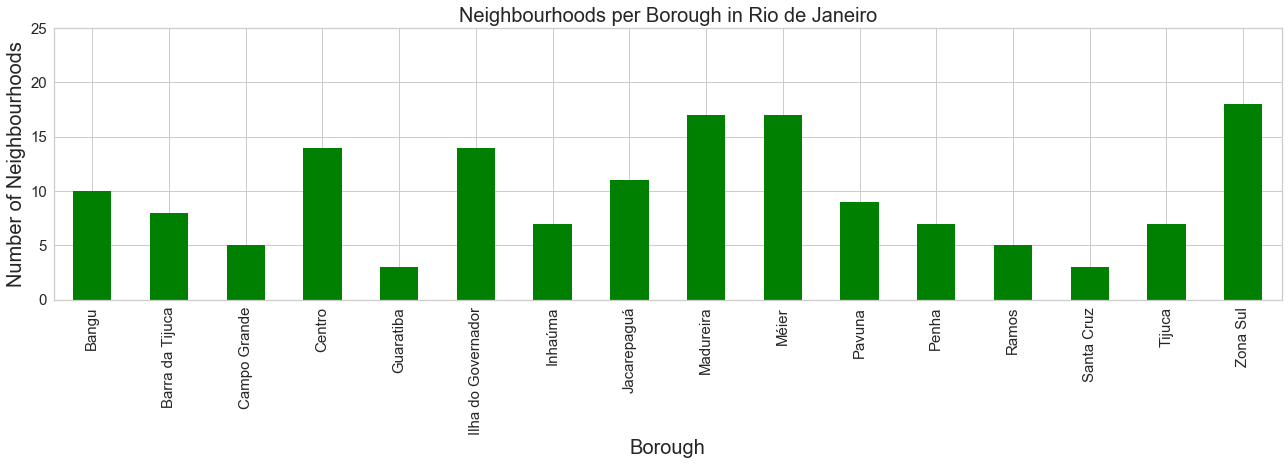

In [70]:
ax00 = RioNeighbourhoodData.groupby('Borough')['Neighbourhood'].count().plot.bar(figsize=(22,5),color='green', fontsize = 15)
ax00.set_title('Neighbourhoods per Borough in Rio de Janeiro', fontsize = 20)
ax00.set_xlabel('Borough',fontsize = 20)
ax00.set_ylabel('Number of Neighbourhoods',fontsize = 20)
ax00.set_ylim(0,25)
plt.show()

In [71]:
print('The dataframe has {} Boroughs and {} Neighbourhoods in Rio de Janeiro.'.format(
        len(RioNeighbourhoodData['Borough'].unique()),
        RioNeighbourhoodData.shape[0]
    )
)

The dataframe has 16 Boroughs and 155 Neighbourhoods in Rio de Janeiro.


##### 2.2.4.2 Get the coordinates Rio de Janeiro

In [72]:
RioAddress = 'Taquara, Rio de Janeiro'
RioGeolocator = Nominatim(user_agent="RioExplorer")
RioLocation = RioGeolocator.geocode(RioAddress)
RioLatitude = RioLocation.latitude
RioLongitude = RioLocation.longitude
print('The geograpical coordinate of Rio de Janeiro are {}, {}.'.format(RioLatitude, RioLongitude))

The geograpical coordinate of Rio de Janeiro are -22.9218864, -43.384646.


##### 2.2.4.3 Create a map of Rio de Janeiro

In [73]:
RioNeighbourhoodMapData = RioNeighbourhoodData.copy()
RioNeighbourhoodMapData.insert(0, 'BoroughNumber', pd.factorize(RioNeighbourhoodMapData.Borough)[0])
RioMap = folium.Map(location=[RioLatitude, RioLongitude], zoom_start=11)
x = np.arange(len(RioNeighbourhoodMapData['Borough'].unique()))
ys = [i + x + (i*x)**2 for i in range(len(RioNeighbourhoodMapData['Borough'].unique()))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for RioBoroughNumber, RioBorough, RioNeighbourhood, RioLatitude, RioLongitude in zip(
    RioNeighbourhoodMapData['BoroughNumber'],
    RioNeighbourhoodMapData['Borough'],
    RioNeighbourhoodMapData['Neighbourhood'],
    RioNeighbourhoodMapData['Latitude'],
    RioNeighbourhoodMapData['Longitude']):
    label = folium.Popup('Neighbourhood: ' + str(RioNeighbourhood) + ' - Borough: ' + str (RioBorough), parse_html = True)
    folium.CircleMarker(
        [RioLatitude,
         RioLongitude],
        radius=5,
        popup=label,
        color = rainbow[RioBoroughNumber-1],
        fill=True,
        fill_color = rainbow[RioBoroughNumber-1],
        fill_opacity=0.7,
        parse_html=False).add_to(RioMap)   
RioMap

#### 2.2.5 Explore Rio de Janeiro City Neighbourhoods <a class = 'anchor' id = 'section_2_2_5'></a>

##### 2.2.5.1 Create Data Frame "RioCityNeighbourhoodData" as a subset of Data Frame "RioNeighbourhoodData"

In [74]:
RioCityNeighbourhoodData = RioNeighbourhoodData[(RioNeighbourhoodData['Borough'] == 'Zona Sul') | (RioNeighbourhoodData['Borough'] == 'Centro')].reset_index(drop=True)
RioCityNeighbourhoodData.head(50)

Borough    Neighbourhood   Latitude  Longitude  Population
0     Centro          Benfica -22.892155 -43.240371       25081
1     Centro             Caju -22.886336 -43.209137       20477
2     Centro          Catumbi -22.919537 -43.197248       12556
3     Centro      Cidade Nova -22.910114 -43.201533        5466
4     Centro          Estácio -22.916814 -43.204349       17189
5     Centro           Gamboa -22.897467 -43.192911       13108
6     Centro        Mangueira -22.904052 -43.236438       17835
7     Centro     Rio Comprido -22.928685 -43.208841       43764
8     Centro     Santo Cristo -22.900918 -43.203668       12330
9     Centro            Saúde -22.897272 -43.184292        2749
10    Centro    São Cristóvão -22.900408 -43.222502       26510
11    Centro    Vasco da Gama -22.891400 -43.226748       15482
12  Zona Sul         Botafogo -22.952244 -43.186102       82890
13  Zona Sul           Catete -22.926646 -43.180188       24057
14  Zona Sul      Cosme Velho -22.941586 -43.200735        7178
15  Zona Sul         Flamengo -22.934711 -43.174182       50043
16  Zona Sul           Glória -22.919102 -43.173277        9661
17  Zona Sul            Gávea -22.979819 -43.238828       16003
18  Zona Sul          Humaitá -22.954948 -43.201021       13285
19  Zona Sul  Jardim Botânico -22.964512 -43.224261       18009
20  Zona Sul            Lagoa -22.971085 -43.209238       21198
21  Zona Sul      Laranjeiras -22.935348 -43.188493       45554
22  Zona Sul           Leblon -22.983799 -43.225341       46044
23  Zona Sul          Rocinha -22.988890 -43.248629       69356
24  Zona Sul          Vidigal -22.994742 -43.239963       12797
25  Zona Sul          Ipanema -22.983650 -43.205672       42743
26  Zona Sul       Copacabana -22.969507 -43.186916      146392
27  Zona Sul             Leme -22.961553 -43.166221       14799
28  Zona Sul             Urca -22.954304 -43.167570        7061
29    Centro           Centro -22.906912 -43.181889       41142
30    Centro     Santa Teresa -22.916247 -43.191630       40926
31  Zona Sul      São Conrado -22.988417 -43.269444       10980

##### 2.2.5.2 Verify shape

In [75]:
RioCityNeighbourhoodData.shape

(32, 5)

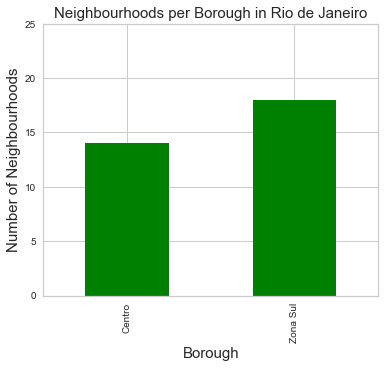

In [76]:
ax00 = RioCityNeighbourhoodData.groupby('Borough')['Neighbourhood'].count().plot.bar(figsize=(6,5),color='green', fontsize = 10)
ax00.set_title('Neighbourhoods per Borough in Rio de Janeiro', fontsize = 15)
ax00.set_xlabel('Borough',fontsize = 15)
ax00.set_ylabel('Number of Neighbourhoods',fontsize = 15)
ax00.set_ylim(0,25)
plt.show()

In [77]:
print('The dataframe has {} Boroughs and {} Neighbourhoods in Rio de Janeiro Centro.'.format(
        len(RioCityNeighbourhoodData['Borough'].unique()),
        RioCityNeighbourhoodData.shape[0]
    )
)

The dataframe has 2 Boroughs and 32 Neighbourhoods in Rio de Janeiro Centro.


##### 2.2.5.3 Get the coordinates of Rio de Janeiro City

In [78]:
RioCityAddress = 'Cosme Velho, Rio de Janeiro'
RioCityGeolocator = Nominatim(user_agent="RioExplorer")
RioCityLocation = RioCityGeolocator.geocode(RioCityAddress)
RioCityLatitude = RioCityLocation.latitude
RioCityLongitude = RioCityLocation.longitude
print('The geograpical coordinate of Rio de Janeiro City are {}, {}.'.format(RioCityLatitude, RioCityLongitude))

The geograpical coordinate of Rio de Janeiro City are -22.9415143, -43.2006244.


##### 2.2.5.4 Create a map of Rio de Janeiro City

In [79]:
RioCityNeighbourhoodMapData = RioCityNeighbourhoodData.copy()
RioCityNeighbourhoodMapData.insert(0, 'BoroughNumber', pd.factorize(RioCityNeighbourhoodMapData.Borough)[0])
RioCityMap = folium.Map(location=[RioCityLatitude, RioCityLongitude], zoom_start=12)
x = np.arange(len(RioCityNeighbourhoodMapData['Borough'].unique()))
ys = [i + x + (i*x)**2 for i in range(len(RioCityNeighbourhoodMapData['Borough'].unique()))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for RioCityBoroughNumber, RioCityBorough, RioCityNeighbourhood, RioCityLatitude, RioCityLongitude in zip(
    RioCityNeighbourhoodMapData['BoroughNumber'],
    RioCityNeighbourhoodMapData['Borough'],
    RioCityNeighbourhoodMapData['Neighbourhood'],
    RioCityNeighbourhoodMapData['Latitude'],
    RioCityNeighbourhoodMapData['Longitude']):
    label = folium.Popup('Neighbourhood: ' + str(RioCityNeighbourhood) + ' - Borough: ' + str (RioCityBorough), parse_html = True)
    folium.CircleMarker(
        [RioCityLatitude,
         RioCityLongitude],
        radius=5,
        popup=label,
        color = rainbow[RioCityBoroughNumber-1],
        fill=True,
        fill_color = rainbow[RioCityBoroughNumber-1],
        fill_opacity=0.7,
        parse_html=False).add_to(RioCityMap)  
RioCityMap

#### 2.2.6 Explore Rio de Janeiro City Neighbourhoods with Foursquare API <a class = 'anchor' id = 'section_2_2_6'></a>

##### 2.2.6.1 Explore the first Neighbourhood in Data Frame "RioCityNeighbourhoodData'

In [80]:
RioCityNeighbourhoodData.loc[0, 'Neighbourhood']

'Benfica'

In [81]:
RioCityNeighbourhoodName = RioCityNeighbourhoodData.loc[0, 'Neighbourhood'] # Neighbourhood name
RioCityNeighbourhoodLatitude = RioCityNeighbourhoodData.loc[0, 'Latitude'] # Neighbourhood latitude value
RioCityNeighbourhoodLongitude = RioCityNeighbourhoodData.loc[0, 'Longitude'] # Neighbourhood longitude value
print('Latitude and longitude values of {} are {}, {}.'.format(RioCityNeighbourhoodName, 
                                                               RioCityNeighbourhoodLatitude, 
                                                               RioCityNeighbourhoodLongitude))

Latitude and longitude values of Benfica are -22.892155181327478, -43.24037123930325.


In [82]:
RioCityNeighbourhoodRadius = 1000
RioCityNeighbourhoodLimit = 50
RioCityNeighbourhoodUrl = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4bf58dd8d48988d16b941735'.format(
    CLIENT_ID,
    CLIENT_SECRET, 
    VERSION, 
    RioCityNeighbourhoodLatitude, 
    RioCityNeighbourhoodLongitude, 
    RioCityNeighbourhoodRadius, 
    RioCityNeighbourhoodLimit)
RioCityNeighbourhoodUrl

'https://api.foursquare.com/v2/venues/explore?&client_id=5ZFTKSMHL3CRCN4N2KRZSSBWCXR1ENL230ZGVTVA1QEITZKD&client_secret=WDSN0USS2CNSKC2ZT1YKJ1UGP4HOGB4TNHTPDIES0ZYO02VH&v=20180605&ll=-22.892155181327478,-43.24037123930325&radius=1000&limit=50&categoryId=4bf58dd8d48988d16b941735'

In [83]:
RioCityNeighbourhoodResults = requests.get(RioCityNeighbourhoodUrl).json()
RioCityNeighbourhoodResults

{'meta': {'code': 200, 'requestId': '5f22ec4320cef5622ebf4f10'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Benfica',
  'headerFullLocation': 'Benfica, Rio de Janeiro',
  'headerLocationGranularity': 'neighborhood',
  'query': 'brazilian',
  'totalResults': 8,
  'suggestedBounds': {'ne': {'lat': -22.88315517232747,
    'lng': -43.23062001500337},
   'sw': {'lat': -22.901155190327486, 'lng': -43.250122463603134}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ccad7ca1ce5236ac8b0c165',
       'name': 'Zinho Bier',
       'location': {'address': 'R. S. Luís Gonzaga, 2330',
        'lat': -22.892578203330576,
        'lng': -43.239662043359836,
        'labeledLatLngs': [{'labe

##### 2.2.6.2 Extract the category of the venue

In [84]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

##### 2.2.6.3 Clean json and structure it into a Pandas Data Frame

In [85]:
RioCityNeighbourhoodVenues = RioCityNeighbourhoodResults['response']['groups'][0]['items']   
RioCityNeighbourhoodNearbyVenues = pd.json_normalize(RioCityNeighbourhoodVenues)
RioCityNeighbourhoodFilteredColumns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
RioCityNeighbourhoodNearbyVenues = RioCityNeighbourhoodNearbyVenues.loc[:, RioCityNeighbourhoodFilteredColumns]
RioCityNeighbourhoodNearbyVenues['venue.categories'] = RioCityNeighbourhoodNearbyVenues.apply(get_category_type, axis=1)
RioCityNeighbourhoodNearbyVenues.columns = [col.split(".")[-1] for col in RioCityNeighbourhoodNearbyVenues.columns]
RioCityNeighbourhoodNearbyVenues.head(20)

name            categories  \
0                                         Zinho Bier  Brazilian Restaurant   
1                                  Poleiro do Galeto  Brazilian Restaurant   
2                 Bar e Restaurante Cantinho da Fafá  Brazilian Restaurant   
3                                      Planeta Sabor  Brazilian Restaurant   
4                                Congelados da Sônia  Brazilian Restaurant   
5  Via Gourmet - Cantina Record - Central De Jorn...  Brazilian Restaurant   
6                                   Casa Verde Grill  Brazilian Restaurant   
7                                            Corujão  Brazilian Restaurant   

         lat        lng  
0 -22.892578 -43.239662  
1 -22.895304 -43.234554  
2 -22.900265 -43.244398  
3 -22.894330 -43.236493  
4 -22.895029 -43.238487  
5 -22.895593 -43.241891  
6 -22.895006 -43.242699  
7 -22.895447 -43.234211

In [86]:
print('{} venues were returned by Foursquare.'.format(RioCityNeighbourhoodNearbyVenues.shape[0]))

8 venues were returned by Foursquare.


<a id='item2'></a>

##### 2.2.6.4 Explore Rio de Janeiro Neighbourhoods in Rio de Janeiro City

In [87]:
RioCityNeigborhoodLimit = 50
def getNearbyVenues(RioCityNeighbourhoodNames, RioCityNeighbourhoodLatitudes, RioCityNeighbourhoodLongitudes, RioCityNeighbourhoodRadius = 1000):
    RioCityNeighbourhoodVenuesList=[]
    for RioCityNeighbourhoodName, RioCityNeighbourhoodLatitude, RioCityNeighbourhoodLongitude in zip(RioCityNeighbourhoodNames, RioCityNeighbourhoodLatitudes, RioCityNeighbourhoodLongitudes):
        RioCityNeighbourhoodUrl = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4bf58dd8d48988d16b941735'.format(
            CLIENT_ID,
            CLIENT_SECRET, 
            VERSION, 
            RioCityNeighbourhoodLatitude, 
            RioCityNeighbourhoodLongitude, 
            RioCityNeighbourhoodRadius, 
            RioCityNeighbourhoodLimit)        
        # make the GET request
        RioCityNeighbourhoodResults = requests.get(RioCityNeighbourhoodUrl).json()["response"]['groups'][0]['items']       
        # return only relevant information for each nearby venue
        RioCityNeighbourhoodVenuesList.append([(
            RioCityNeighbourhoodName,
            RioCityLatitude, 
            RioCityNeighbourhoodLongitude, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in RioCityNeighbourhoodResults])

    RioCityNeighbourhoodNearbyVenues = pd.DataFrame([item for RioCityNeighbourhoodVenueList in RioCityNeighbourhoodVenuesList for item in RioCityNeighbourhoodVenueList])
    RioCityNeighbourhoodNearbyVenues.columns = [
                  'Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(RioCityNeighbourhoodNearbyVenues)

##### 2.2.6.5 Create a Data Frame "RioNeighbourhoodVenues" for Rio de Janeiro City

In [88]:
RioCityNeighbourhoodVenues = getNearbyVenues(RioCityNeighbourhoodNames = RioCityNeighbourhoodData['Neighbourhood'],
                                   RioCityNeighbourhoodLatitudes = RioCityNeighbourhoodData['Latitude'],
                                   RioCityNeighbourhoodLongitudes = RioCityNeighbourhoodData['Longitude']
                                  )
RioCityNeighbourhoodVenues.head()

Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0       Benfica              -22.988417               -43.240371   
1       Benfica              -22.988417               -43.240371   
2       Benfica              -22.988417               -43.240371   
3       Benfica              -22.988417               -43.240371   
4       Benfica              -22.988417               -43.240371   

                                Venue  Venue Latitude  Venue Longitude  \
0                          Zinho Bier      -22.892578       -43.239662   
1                   Poleiro do Galeto      -22.895304       -43.234554   
2  Bar e Restaurante Cantinho da Fafá      -22.900265       -43.244398   
3                       Planeta Sabor      -22.894330       -43.236493   
4                 Congelados da Sônia      -22.895029       -43.238487   

         Venue Category  
0  Brazilian Restaurant  
1  Brazilian Restaurant  
2  Brazilian Restaurant  
3  Brazilian Restaurant  
4  Brazilian Restaurant

##### 2.2.6.6 Verify shape

In [89]:
RioCityNeighbourhoodVenues.shape

(904, 7)

##### 2.2.6.7 Verify the number of venues for each Neighbourhood

In [90]:
NumberOfRioCityVenues = RioCityNeighbourhoodVenues.groupby('Neighbourhood').count().copy()
NumberOfRioCityVenues.drop(columns = ['Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude'], inplace = True)
NumberOfRioCityVenues.rename(columns = {'Venue Category': 'Number of Venues'}, inplace = True)
NumberOfRioCityVenues

Number of Venues
Neighbourhood                    
Benfica                         8
Botafogo                       50
Caju                            1
Catete                         50
Catumbi                        17
Centro                         50
Cidade Nova                    36
Copacabana                     50
Cosme Velho                     9
Estácio                        40
Flamengo                       44
Gamboa                         36
Glória                         50
Gávea                           4
Humaitá                        33
Ipanema                        50
Jardim Botânico                13
Lagoa                           5
Laranjeiras                    20
Leblon                         43
Leme                           23
Mangueira                       9
Rio Comprido                   17
Rocinha                         5
Santa Teresa                   50
Santo Cristo                   14
Saúde                          50
São Conrado                     2
São Cristóvão                  50
Urca                           27
Vasco da Gama                  41
Vidigal                         7

##### 2.2.6.8 Verify the number of unique categories

In [91]:
print('There are {} uniques categories.'.format(len(RioCityNeighbourhoodVenues['Venue Category'].unique())))

There are 28 uniques categories.


In [92]:
RioCityNeighbourhoodVenues['Venue Category'].unique()

array(['Brazilian Restaurant', 'Bar', 'Central Brazilian Restaurant',
       'Churrascaria', 'Ice Cream Shop',
       'Southeastern Brazilian Restaurant',
       'Northeastern Brazilian Restaurant', 'Pastelaria', 'Wine Shop',
       'Convenience Store', 'Café', 'Food Stand', 'Empada House',
       'Acai House', 'College Cafeteria', 'BBQ Joint', 'Pastry Shop',
       'Mineiro Restaurant', 'Pizza Place', 'Sandwich Place',
       'Tapiocaria', 'Cocktail Bar', 'Bakery', 'Coffee Shop', 'Juice Bar',
       'Northern Brazilian Restaurant', 'Seafood Restaurant',
       'Music Venue'], dtype=object)

In [93]:
RioCityNeighbourhoodVenues = RioCityNeighbourhoodVenues.replace(['Music Venue','Ice Cream Shop','Bar','Café','Food Stand','Wine Shop','Convenience Store','BBQ Joint','Pastry Shop','Pizza Place','Seafood Restaurant','College Cafeteria','Sandwich Place','Vegetarian / Vegan Restaurant','Cocktail Bar','Bakery','Coffee Shop'], np.nan, regex = True)
RioCityNeighbourhoodVenues.dropna(subset=['Venue Category'], inplace = True)
RioCityNeighbourhoodVenues.head()

Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0       Benfica              -22.988417               -43.240371   
1       Benfica              -22.988417               -43.240371   
2       Benfica              -22.988417               -43.240371   
3       Benfica              -22.988417               -43.240371   
4       Benfica              -22.988417               -43.240371   

                 Venue  Venue Latitude  Venue Longitude        Venue Category  
0           Zinho Bier      -22.892578       -43.239662  Brazilian Restaurant  
1    Poleiro do Galeto      -22.895304       -43.234554  Brazilian Restaurant  
2                  NaN      -22.900265       -43.244398  Brazilian Restaurant  
3        Planeta Sabor      -22.894330       -43.236493  Brazilian Restaurant  
4  Congelados da Sônia      -22.895029       -43.238487  Brazilian Restaurant

In [94]:
RioCityNeighbourhoodVenues.shape

(869, 7)

In [95]:
print('There are {} unique Brazilian categories.'.format(len(RioCityNeighbourhoodVenues['Venue Category'].unique())))

There are 11 unique Brazilian categories.


In [96]:
RioCityNeighbourhoodVenues['Venue Category'].unique()

array(['Brazilian Restaurant', 'Central Brazilian Restaurant',
       'Churrascaria', 'Southeastern Brazilian Restaurant',
       'Northeastern Brazilian Restaurant', 'Pastelaria', 'Empada House',
       'Acai House', 'Mineiro Restaurant', 'Tapiocaria',
       'Northern Brazilian Restaurant'], dtype=object)

<a id='item3'></a>

##### 2.2.6.9 Analyze Each Neighbourhood

In [97]:
RioCityNeighbourhoodOnehot = pd.get_dummies(RioCityNeighbourhoodVenues[['Venue Category']], prefix="", prefix_sep="")
RioCityNeighbourhoodOnehot['Neighbourhood'] = RioCityNeighbourhoodVenues['Neighbourhood'] 
RioCityNeighbourhoodFixedColumns = [RioCityNeighbourhoodOnehot.columns[-1]] + list(RioCityNeighbourhoodOnehot.columns[:-1])
RioCityNeighbourhoodOnehot = RioCityNeighbourhoodOnehot[RioCityNeighbourhoodFixedColumns]
RioCityNeighbourhoodOnehot.head()

Neighbourhood  Acai House  Brazilian Restaurant  \
0       Benfica           0                     1   
1       Benfica           0                     1   
2       Benfica           0                     1   
3       Benfica           0                     1   
4       Benfica           0                     1   

   Central Brazilian Restaurant  Churrascaria  Empada House  \
0                             0             0             0   
1                             0             0             0   
2                             0             0             0   
3                             0             0             0   
4                             0             0             0   

   Mineiro Restaurant  Northeastern Brazilian Restaurant  \
0                   0                                  0   
1                   0                                  0   
2                   0                                  0   
3                   0                                  0   
4                   0                                  0   

   Northern Brazilian Restaurant  Pastelaria  \
0                              0           0   
1                              0           0   
2                              0           0   
3                              0           0   
4                              0           0   

   Southeastern Brazilian Restaurant  Tapiocaria  
0                                  0           0  
1                                  0           0  
2                                  0           0  
3                                  0           0  
4                                  0           0

##### 2.2.6.10 Verify shape

In [98]:
RioCityNeighbourhoodOnehot.shape

(869, 12)

##### 2.2.6.11 Group rows by Neighbourhood by taking the mean of occurance frequency

In [99]:
RioCityNeighbourhoodVenueGrouped = RioCityNeighbourhoodOnehot.groupby('Neighbourhood').mean().reset_index()
RioCityNeighbourhoodVenueGrouped

Neighbourhood  Acai House  Brazilian Restaurant  \
0           Benfica    0.000000              1.000000   
1          Botafogo    0.000000              0.978723   
2              Caju    0.000000              1.000000   
3            Catete    0.000000              0.978261   
4           Catumbi    0.000000              0.937500   
5            Centro    0.000000              1.000000   
6       Cidade Nova    0.000000              0.972222   
7        Copacabana    0.000000              0.978261   
8       Cosme Velho    0.000000              0.888889   
9           Estácio    0.000000              0.923077   
10         Flamengo    0.023256              0.837209   
11           Gamboa    0.000000              0.888889   
12           Glória    0.000000              1.000000   
13            Gávea    0.000000              0.666667   
14          Humaitá    0.000000              0.870968   
15          Ipanema    0.086957              0.847826   
16  Jardim Botânico    0.000000              0.916667   
17            Lagoa    0.000000              1.000000   
18      Laranjeiras    0.000000              0.900000   
19           Leblon    0.000000              0.900000   
20             Leme    0.000000              1.000000   
21        Mangueira    0.000000              1.000000   
22     Rio Comprido    0.000000              0.882353   
23          Rocinha    0.000000              1.000000   
24     Santa Teresa    0.000000              1.000000   
25     Santo Cristo    0.000000              1.000000   
26            Saúde    0.000000              1.000000   
27      São Conrado    0.000000              1.000000   
28    São Cristóvão    0.000000              0.780000   
29             Urca    0.000000              1.000000   
30    Vasco da Gama    0.000000              0.756098   
31          Vidigal    0.000000              0.857143   

    Central Brazilian Restaurant  Churrascaria  Empada House  \
0                         0.0000      0.000000      0.000000   
1                         0.0000      0.021277      0.000000   
2                         0.0000      0.000000      0.000000   
3                         0.0000      0.021739      0.000000   
4                         0.0625      0.000000      0.000000   
5                         0.0000      0.000000      0.000000   
6                         0.0000      0.027778      0.000000   
7                         0.0000      0.021739      0.000000   
8                         0.0000      0.000000      0.000000   
9                         0.0000      0.025641      0.000000   
10                        0.0000      0.046512      0.023256   
11                        0.0000      0.000000      0.000000   
12                        0.0000      0.000000      0.000000   
13                        0.0000      0.000000      0.333333   
14                        0.0000      0.000000      0.000000   
15                        0.0000      0.043478      0.000000   
16                        0.0000      0.000000      0.000000   
17                        0.0000      0.000000      0.000000   
18                        0.0000      0.000000      0.000000   
19                        0.0000      0.000000      0.025000   
20                        0.0000      0.000000      0.000000   
21                        0.0000      0.000000      0.000000   
22                        0.0000      0.000000      0.000000   
23                        0.0000      0.000000      0.000000   
24                        0.0000      0.000000      0.000000   
25                        0.0000      0.000000      0.000000   
26                        0.0000      0.000000      0.000000   
27                        0.0000      0.000000      0.000000   
28                        0.0000      0.000000      0.000000   
29                        0.0000      0.000000      0.000000   
30                        0.0000      0.000000      0.000000   
31                        0.0000      0.000000      0.000000   

    Mineiro

##### 2.2.6.12 Print the top most common venues for each Neighbourhood

In [100]:
NumberOfRioCityNeighbourhoodTopVenues = 11
for RioCityNeighbourhood in RioCityNeighbourhoodVenueGrouped['Neighbourhood']:
    print("----"+RioCityNeighbourhood+"----")
    temp = RioCityNeighbourhoodVenueGrouped[RioCityNeighbourhoodVenueGrouped['Neighbourhood'] == RioCityNeighbourhood].T.reset_index()
    temp.columns = ['Venue','Mean of Occurence Frequency']
    temp = temp.iloc[1:]
    temp['Mean of Occurence Frequency'] = temp['Mean of Occurence Frequency'].astype(float)
    temp = temp.round({'Mean of Occurence Frequency':2})
    print(temp.sort_values('Mean of Occurence Frequency', ascending=False).reset_index(drop=True).head(NumberOfRioCityNeighbourhoodTopVenues))
    print('\n')

----Benfica----
                                Venue  Mean of Occurence Frequency
0                Brazilian Restaurant                          1.0
1                          Acai House                          0.0
2        Central Brazilian Restaurant                          0.0
3                        Churrascaria                          0.0
4                        Empada House                          0.0
5                  Mineiro Restaurant                          0.0
6   Northeastern Brazilian Restaurant                          0.0
7       Northern Brazilian Restaurant                          0.0
8                          Pastelaria                          0.0
9   Southeastern Brazilian Restaurant                          0.0
10                         Tapiocaria                          0.0


----Botafogo----
                                Venue  Mean of Occurence Frequency
0                Brazilian Restaurant                         0.98
1                        Ch

##### 2.2.6.13 Sort the venues in descending order

In [101]:
def return_most_common_venues(row, NumberOfRioCityNeighbourhoodTopVenues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:NumberOfRioCityNeighbourhoodTopVenues]

##### 2.2.6.14 Create a Data Frame for the top most common venues for each Neighbourhood

In [106]:
NumberOfRioCityNeighbourhoodTopVenues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Neighbourhood']
for ind in np.arange(NumberOfRioCityNeighbourhoodTopVenues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
RioCityNeighbourhoodVenuesSorted = pd.DataFrame(columns=columns)
RioCityNeighbourhoodVenuesSorted['Neighbourhood'] = RioCityNeighbourhoodVenueGrouped['Neighbourhood']
for ind in np.arange(RioCityNeighbourhoodVenueGrouped.shape[0]):
    RioCityNeighbourhoodVenuesSorted.iloc[ind, 1:] = return_most_common_venues(RioCityNeighbourhoodVenueGrouped.iloc[ind, :], NumberOfRioCityNeighbourhoodTopVenues)
RioCityNeighbourhoodVenuesSorted

Neighbourhood 1st Most Common Venue              2nd Most Common Venue  \
0           Benfica  Brazilian Restaurant                         Tapiocaria   
1          Botafogo  Brazilian Restaurant                       Churrascaria   
2              Caju  Brazilian Restaurant                         Tapiocaria   
3            Catete  Brazilian Restaurant                       Churrascaria   
4           Catumbi  Brazilian Restaurant       Central Brazilian Restaurant   
5            Centro  Brazilian Restaurant                         Tapiocaria   
6       Cidade Nova  Brazilian Restaurant                       Churrascaria   
7        Copacabana  Brazilian Restaurant                       Churrascaria   
8       Cosme Velho  Brazilian Restaurant                         Pastelaria   
9           Estácio  Brazilian Restaurant  Southeastern Brazilian Restaurant   
10         Flamengo  Brazilian Restaurant                       Churrascaria   
11           Gamboa  Brazilian Restaurant  Southeastern Brazilian Restaurant   
12           Glória  Brazilian Restaurant                         Tapiocaria   
13            Gávea  Brazilian Restaurant                       Empada House   
14          Humaitá  Brazilian Restaurant                 Mineiro Restaurant   
15          Ipanema  Brazilian Restaurant                         Acai House   
16  Jardim Botânico  Brazilian Restaurant                         Pastelaria   
17            Lagoa  Brazilian Restaurant                         Tapiocaria   
18      Laranjeiras  Brazilian Restaurant                         Pastelaria   
19           Leblon  Brazilian Restaurant                         Tapiocaria   
20             Leme  Brazilian Restaurant                         Tapiocaria   
21        Mangueira  Brazilian Restaurant                         Tapiocaria   
22     Rio Comprido  Brazilian Restaurant                         Pastelaria   
23          Rocinha  Brazilian Restaurant                         Tapiocaria   
24     Santa Teresa  Brazilian Restaurant                         Tapiocaria   
25     Santo Cristo  Brazilian Restaurant                         Tapiocaria   
26            Saúde  Brazilian Restaurant                         Tapiocaria   
27      São Conrado  Brazilian Restaurant                         Tapiocaria   
28    São Cristóvão  Brazilian Restaurant  Northeastern Brazilian Restaurant   
29             Urca  Brazilian Restaurant                         Tapiocaria   
30    Vasco da Gama  Brazilian Restaurant  Northeastern Brazilian Restaurant   
31          Vidigal  Brazilian Restaurant  Southeastern Brazilian Restaurant   

                3rd Most Common Venue              4th Most Common Venue  \
0   Southeastern Brazilian Restaurant                         Pastelaria   
1                          Tapiocaria  Southeastern Brazilian Restaurant   
2   Southeastern Brazilian Restaurant                         Pastelaria   
3                          Tapiocaria  Southeastern Brazilian Restaurant   
4                          Tapiocaria  Southeastern Brazilian Restaurant   
5   Southeastern Brazilian Restaurant                         Pastelaria   
6                          Tapiocaria  Southeastern Brazilian Restaurant   
7                          Tapiocaria  Southeastern Brazilian Restaurant   
8                          Tapiocaria  Southeastern Brazilian Restaurant   
9   Northeastern Brazilian Restaurant                       Churrascaria   
10  Southeastern Brazilian Restaurant                         Pastelaria   
11                         Pastelaria                         Tapiocaria   
12  Southeastern Brazilian Restaurant                         Pastelaria   
13                         Tapiocaria  Southeastern Brazilian Restaurant   
14  Southeastern Brazilian Restaurant                         Tapiocaria   
15                       Churrascaria      Northern Brazilian Restaurant   
16                         Tapiocaria  Southeastern Brazilian Restaurant 

<a id='item4'></a>

### 2.3 k-means Clustering of Rio de Janeiro City Neighbourhood Restaurants <a class = 'anchor' id = 'section_2_3'></a>

#### 2.3.1 Run k-means <a class = 'anchor' id = 'section_2_3_1'></a>

In [108]:
NumberOfRioCityNeighbourhoodClusters = 7
RioCityNeighbourhoodGroupedClustering = RioCityNeighbourhoodVenueGrouped.drop('Neighbourhood', 1)
KMeansRioCityNeighbourhood = KMeans(n_clusters = NumberOfRioCityNeighbourhoodClusters, random_state = 0).fit(RioCityNeighbourhoodGroupedClustering)
KMeansRioCityNeighbourhood.labels_[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 2, 5, 0, 1, 4, 2, 5, 0, 5, 4, 0, 0,
       5, 0, 0, 0, 0, 0, 3, 0, 3, 6], dtype=int32)

#### 2.3.2 KElbowVisualizer (The Silhouette Metric) <a class = 'anchor' id = 'section_2_3_2'></a>

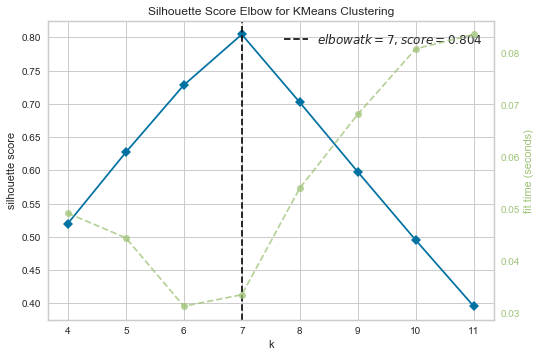

In [109]:
KMeansModel = KMeans(n_clusters = NumberOfRioCityNeighbourhoodClusters, random_state = 0).fit(RioCityNeighbourhoodGroupedClustering)
X, y = make_blobs(n_samples = 1000, n_features = 11, centers = 7, random_state = 42)
visualizer = KElbowVisualizer(KMeansModel, k = (4,12),metric =  'silhouette', timing = False)
visualizer.fit(X)
visualizer.show()

#### 2.3.3 KElbowVisualizer (The Calinski Harabaz Metric) <a class = 'anchor' id = 'section_2_3_3'></a>

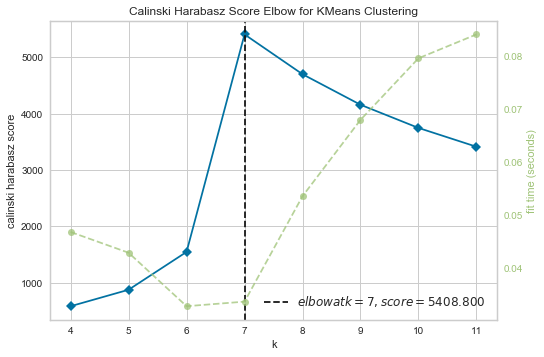

In [110]:
KMeansModel = KMeans(n_clusters = NumberOfRioCityNeighbourhoodClusters, random_state = 0).fit(RioCityNeighbourhoodGroupedClustering)
X, y = make_blobs(n_samples = 1000, n_features = 11, centers = 7, random_state = 42)
visualizer = KElbowVisualizer(KMeansModel, k = (4,12), metric = 'calinski_harabasz', timing = False)
visualizer.fit(X)
visualizer.show()

#### 2.3.4 The top 10 most common restaurants for each Rio de Janeiro City Neighbourhood <a class = 'anchor' id = 'section_2_3_4'></a>

In [111]:
RioCityNeighbourhoodVenuesSorted.insert(0, 'Cluster Labels', KMeansRioCityNeighbourhood.labels_)
RioCityNeighbourhoodMerged = RioCityNeighbourhoodData
RioCityNeighbourhoodMerged = RioCityNeighbourhoodMerged.join(RioCityNeighbourhoodVenuesSorted.set_index('Neighbourhood'), on='Neighbourhood')
RioCityNeighbourhoodMerged.dropna(subset = ['Cluster Labels'], inplace = True)
RioCityNeighbourhoodMerged['Cluster Labels'] = RioCityNeighbourhoodMerged['Cluster Labels'].astype(int)
RioCityNeighbourhoodMerged.head()

Borough Neighbourhood   Latitude  Longitude  Population  Cluster Labels  \
0  Centro       Benfica -22.892155 -43.240371       25081               0   
1  Centro          Caju -22.886336 -43.209137       20477               0   
2  Centro       Catumbi -22.919537 -43.197248       12556               0   
3  Centro   Cidade Nova -22.910114 -43.201533        5466               0   
4  Centro       Estácio -22.916814 -43.204349       17189               4   

  1st Most Common Venue              2nd Most Common Venue  \
0  Brazilian Restaurant                         Tapiocaria   
1  Brazilian Restaurant                         Tapiocaria   
2  Brazilian Restaurant       Central Brazilian Restaurant   
3  Brazilian Restaurant                       Churrascaria   
4  Brazilian Restaurant  Southeastern Brazilian Restaurant   

               3rd Most Common Venue              4th Most Common Venue  \
0  Southeastern Brazilian Restaurant                         Pastelaria   
1  Southeastern Brazilian Restaurant                         Pastelaria   
2                         Tapiocaria  Southeastern Brazilian Restaurant   
3                         Tapiocaria  Southeastern Brazilian Restaurant   
4  Northeastern Brazilian Restaurant                       Churrascaria   

           5th Most Common Venue              6th Most Common Venue  \
0  Northern Brazilian Restaurant  Northeastern Brazilian Restaurant   
1  Northern Brazilian Restaurant  Northeastern Brazilian Restaurant   
2                     Pastelaria      Northern Brazilian Restaurant   
3                     Pastelaria      Northern Brazilian Restaurant   
4                     Tapiocaria                         Pastelaria   

               7th Most Common Venue 8th Most Common Venue  \
0                 Mineiro Restaurant          Empada House   
1                 Mineiro Restaurant          Empada House   
2  Northeastern Brazilian Restaurant    Mineiro Restaurant   
3  Northeastern Brazilian Restaurant    Mineiro Restaurant   
4      Northern Brazilian Restaurant    Mineiro Restaurant   

  9th Most Common Venue        10th Most Common Venue  
0          Churrascaria  Central Brazilian Restaurant  
1          Churrascaria  Central Brazilian Restaurant  
2          Empada House                  Churrascaria  
3          Empada House  Central Brazilian Restaurant  
4          Empada House  Central Brazilian Restaurant

#### 2.3.5 Visualize the resulting Rio de Janeiro City Clusters <a class = 'anchor' id = 'section_2_3_5'></a>

In [112]:
RioCityClustersMap = folium.Map(location=[RioCityLatitude, RioCityLongitude], zoom_start=11)
x = np.arange(NumberOfRioCityNeighbourhoodClusters)
ys = [i + x + (i*x)**2 for i in range(NumberOfRioCityNeighbourhoodClusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for RioCityNeighbourhood,RioCityLatitude, RioCityLongitude, cluster in zip(
    RioCityNeighbourhoodMerged['Neighbourhood'],
    RioCityNeighbourhoodMerged['Latitude'],
    RioCityNeighbourhoodMerged['Longitude'],
    RioCityNeighbourhoodMerged['Cluster Labels']):
    label = folium.Popup(str(RioCityNeighbourhood) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [RioCityLatitude, RioCityLongitude],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(RioCityClustersMap)
RioCityClustersMap

<a id='item5'></a>

#### 2.3.6 Examine the Rio de Janeiro City Clusters <a class = 'anchor' id = 'section_2_3_6'></a>

##### 2.3.6.1 Cluster 1

In [113]:
RioCityNeighbourhoodMerged.loc[RioCityNeighbourhoodMerged['Cluster Labels'] == 0, RioCityNeighbourhoodMerged.columns[[1] + list(range(5, RioCityNeighbourhoodMerged.shape[1]))]]

Neighbourhood  Cluster Labels 1st Most Common Venue  \
0        Benfica               0  Brazilian Restaurant   
1           Caju               0  Brazilian Restaurant   
2        Catumbi               0  Brazilian Restaurant   
3    Cidade Nova               0  Brazilian Restaurant   
6      Mangueira               0  Brazilian Restaurant   
8   Santo Cristo               0  Brazilian Restaurant   
9          Saúde               0  Brazilian Restaurant   
12      Botafogo               0  Brazilian Restaurant   
13        Catete               0  Brazilian Restaurant   
16        Glória               0  Brazilian Restaurant   
20         Lagoa               0  Brazilian Restaurant   
23       Rocinha               0  Brazilian Restaurant   
26    Copacabana               0  Brazilian Restaurant   
27          Leme               0  Brazilian Restaurant   
28          Urca               0  Brazilian Restaurant   
29        Centro               0  Brazilian Restaurant   
30  Santa Teresa               0  Brazilian Restaurant   
31   São Conrado               0  Brazilian Restaurant   

           2nd Most Common Venue              3rd Most Common Venue  \
0                     Tapiocaria  Southeastern Brazilian Restaurant   
1                     Tapiocaria  Southeastern Brazilian Restaurant   
2   Central Brazilian Restaurant                         Tapiocaria   
3                   Churrascaria                         Tapiocaria   
6                     Tapiocaria  Southeastern Brazilian Restaurant   
8                     Tapiocaria  Southeastern Brazilian Restaurant   
9                     Tapiocaria  Southeastern Brazilian Restaurant   
12                  Churrascaria                         Tapiocaria   
13                  Churrascaria                         Tapiocaria   
16                    Tapiocaria  Southeastern Brazilian Restaurant   
20                    Tapiocaria  Southeastern Brazilian Restaurant   
23                    Tapiocaria  Southeastern Brazilian Restaurant   
26                  Churrascaria                         Tapiocaria   
27                    Tapiocaria  Southeastern Brazilian Restaurant   
28                    Tapiocaria  Southeastern Brazilian Restaurant   
29                    Tapiocaria  Southeastern Brazilian Restaurant   
30                    Tapiocaria  Southeastern Brazilian Restaurant   
31                    Tapiocaria  Southeastern Brazilian Restaurant   

                4th Most Common Venue          5th Most Common Venue  \
0                          Pastelaria  Northern Brazilian Restaurant   
1                          Pastelaria  Northern Brazilian Restaurant   
2   Southeastern Brazilian Restaurant                     Pastelaria   
3   Southeastern Brazilian Restaurant                     Pastelaria   
6                          Pastelaria  Northern Brazilian Restaurant   
8                          Pastelaria  Northern Brazilian Restaurant   
9                          Pastelaria  Northern Brazilian Restaurant   
12  Southeastern Brazilian Restaurant                     Pastelaria   
13  Southeastern Brazilian Restaurant                     Pastelaria   
16                         Pastelaria  Northern Brazilian Restaurant   
20                         Pastelaria  Northern Brazilian Restaurant   
23                         Pastelaria  Northern Brazilian Restaurant   
26  Southeastern Brazilian Restaurant                     Pastelaria   
27                         Pastelaria  Northern Brazilian Restaurant   
28                         Pastelaria  Northern Brazilian Restaurant   
29                         Pastelaria  Northern Brazilian Restaurant   
30                         Pastelaria  Northern Brazilian Restaurant   
31                         Pastelaria  Northern Brazilian Restaurant   

                6th Most Common Venue              7th Most Common Venue  \
0   Northeastern Brazilian Restaurant                 Mineiro Restaurant   
1   Northeastern Brazilian Re

##### 2.3.6.2 Cluster 2

In [114]:
RioCityNeighbourhoodMerged.loc[RioCityNeighbourhoodMerged['Cluster Labels'] == 1, RioCityNeighbourhoodMerged.columns[[1] + list(range(5, RioCityNeighbourhoodMerged.shape[1]))]]

Neighbourhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
17         Gávea               1  Brazilian Restaurant          Empada House   

   3rd Most Common Venue              4th Most Common Venue  \
17            Tapiocaria  Southeastern Brazilian Restaurant   

   5th Most Common Venue          6th Most Common Venue  \
17            Pastelaria  Northern Brazilian Restaurant   

                7th Most Common Venue 8th Most Common Venue  \
17  Northeastern Brazilian Restaurant    Mineiro Restaurant   

   9th Most Common Venue        10th Most Common Venue  
17          Churrascaria  Central Brazilian Restaurant

##### 2.3.6.3 Cluster 3

In [115]:
RioCityNeighbourhoodMerged.loc[RioCityNeighbourhoodMerged['Cluster Labels'] == 2, RioCityNeighbourhoodMerged.columns[[1] + list(range(5, RioCityNeighbourhoodMerged.shape[1]))]]

Neighbourhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
15      Flamengo               2  Brazilian Restaurant          Churrascaria   
25       Ipanema               2  Brazilian Restaurant            Acai House   

                3rd Most Common Venue          4th Most Common Venue  \
15  Southeastern Brazilian Restaurant                     Pastelaria   
25                       Churrascaria  Northern Brazilian Restaurant   

                5th Most Common Venue              6th Most Common Venue  \
15  Northeastern Brazilian Restaurant                       Empada House   
25                         Tapiocaria  Southeastern Brazilian Restaurant   

   7th Most Common Venue              8th Most Common Venue  \
15            Acai House                         Tapiocaria   
25            Pastelaria  Northeastern Brazilian Restaurant   

            9th Most Common Venue 10th Most Common Venue  
15  Northern Brazilian Restaurant     Mineiro Restaurant  
25             Mineiro Restaurant           Empada House

##### 2.3.6.4 Cluster 4

In [116]:
RioCityNeighbourhoodMerged.loc[RioCityNeighbourhoodMerged['Cluster Labels'] == 3, RioCityNeighbourhoodMerged.columns[[1] + list(range(5, RioCityNeighbourhoodMerged.shape[1]))]]

Neighbourhood  Cluster Labels 1st Most Common Venue  \
10  São Cristóvão               3  Brazilian Restaurant   
11  Vasco da Gama               3  Brazilian Restaurant   

                2nd Most Common Venue              3rd Most Common Venue  \
10  Northeastern Brazilian Restaurant  Southeastern Brazilian Restaurant   
11  Northeastern Brazilian Restaurant                         Tapiocaria   

                4th Most Common Venue 5th Most Common Venue  \
10                         Tapiocaria            Pastelaria   
11  Southeastern Brazilian Restaurant            Pastelaria   

            6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
10  Northern Brazilian Restaurant    Mineiro Restaurant          Empada House   
11  Northern Brazilian Restaurant    Mineiro Restaurant          Empada House   

   9th Most Common Venue        10th Most Common Venue  
10          Churrascaria  Central Brazilian Restaurant  
11          Churrascaria  Central Brazilian Restaurant

##### 2.3.6.5 Cluster 5

In [117]:
RioCityNeighbourhoodMerged.loc[RioCityNeighbourhoodMerged['Cluster Labels'] == 4, RioCityNeighbourhoodMerged.columns[[1] + list(range(5, RioCityNeighbourhoodMerged.shape[1]))]]

Neighbourhood  Cluster Labels 1st Most Common Venue  \
4        Estácio               4  Brazilian Restaurant   
18       Humaitá               4  Brazilian Restaurant   
22        Leblon               4  Brazilian Restaurant   

                2nd Most Common Venue              3rd Most Common Venue  \
4   Southeastern Brazilian Restaurant  Northeastern Brazilian Restaurant   
18                 Mineiro Restaurant  Southeastern Brazilian Restaurant   
22                         Tapiocaria                         Pastelaria   

   4th Most Common Venue 5th Most Common Venue  \
4           Churrascaria            Tapiocaria   
18            Tapiocaria            Pastelaria   
22    Mineiro Restaurant          Empada House   

                6th Most Common Venue              7th Most Common Venue  \
4                          Pastelaria      Northern Brazilian Restaurant   
18      Northern Brazilian Restaurant  Northeastern Brazilian Restaurant   
22  Southeastern Brazilian Restaurant      Northern Brazilian Restaurant   

                8th Most Common Venue 9th Most Common Venue  \
4                  Mineiro Restaurant          Empada House   
18                       Empada House          Churrascaria   
22  Northeastern Brazilian Restaurant          Churrascaria   

          10th Most Common Venue  
4   Central Brazilian Restaurant  
18  Central Brazilian Restaurant  
22  Central Brazilian Restaurant

##### 2.3.6.6 Cluster 6

In [118]:
RioCityNeighbourhoodMerged.loc[RioCityNeighbourhoodMerged['Cluster Labels'] == 5, RioCityNeighbourhoodMerged.columns[[1] + list(range(5, RioCityNeighbourhoodMerged.shape[1]))]]

Neighbourhood  Cluster Labels 1st Most Common Venue  \
5            Gamboa               5  Brazilian Restaurant   
7      Rio Comprido               5  Brazilian Restaurant   
14      Cosme Velho               5  Brazilian Restaurant   
19  Jardim Botânico               5  Brazilian Restaurant   
21      Laranjeiras               5  Brazilian Restaurant   

                2nd Most Common Venue              3rd Most Common Venue  \
5   Southeastern Brazilian Restaurant                         Pastelaria   
7                          Pastelaria  Northeastern Brazilian Restaurant   
14                         Pastelaria                         Tapiocaria   
19                         Pastelaria                         Tapiocaria   
21                         Pastelaria  Northeastern Brazilian Restaurant   

                4th Most Common Venue              5th Most Common Venue  \
5                          Tapiocaria      Northern Brazilian Restaurant   
7                          Tapiocaria  Southeastern Brazilian Restaurant   
14  Southeastern Brazilian Restaurant      Northern Brazilian Restaurant   
19  Southeastern Brazilian Restaurant      Northern Brazilian Restaurant   
21                         Tapiocaria  Southeastern Brazilian Restaurant   

                6th Most Common Venue 7th Most Common Venue  \
5   Northeastern Brazilian Restaurant    Mineiro Restaurant   
7       Northern Brazilian Restaurant    Mineiro Restaurant   
14  Northeastern Brazilian Restaurant    Mineiro Restaurant   
19  Northeastern Brazilian Restaurant    Mineiro Restaurant   
21      Northern Brazilian Restaurant    Mineiro Restaurant   

   8th Most Common Venue 9th Most Common Venue        10th Most Common Venue  
5           Empada House          Churrascaria  Central Brazilian Restaurant  
7           Empada House          Churrascaria  Central Brazilian Restaurant  
14          Empada House          Churrascaria  Central Brazilian Restaurant  
19          Empada House          Churrascaria  Central Brazilian Restaurant  
21          Empada House          Churrascaria  Central Brazilian Restaurant

##### 2.3.6.7 Cluster 7

In [119]:
RioCityNeighbourhoodMerged.loc[RioCityNeighbourhoodMerged['Cluster Labels'] == 6, RioCityNeighbourhoodMerged.columns[[1] + list(range(5, RioCityNeighbourhoodMerged.shape[1]))]]

Neighbourhood  Cluster Labels 1st Most Common Venue  \
24       Vidigal               6  Brazilian Restaurant   

                2nd Most Common Venue 3rd Most Common Venue  \
24  Southeastern Brazilian Restaurant            Tapiocaria   

   4th Most Common Venue          5th Most Common Venue  \
24            Pastelaria  Northern Brazilian Restaurant   

                6th Most Common Venue 7th Most Common Venue  \
24  Northeastern Brazilian Restaurant    Mineiro Restaurant   

   8th Most Common Venue 9th Most Common Venue        10th Most Common Venue  
24          Empada House          Churrascaria  Central Brazilian Restaurant

##### 2.3.6.8 Cluster 8

In [121]:
#RioCityNeighbourhoodMerged.loc[RioCityNeighbourhoodMerged['Cluster Labels'] == 7, RioCityNeighbourhoodMerged.columns[[1] + list(range(5, RioCityNeighbourhoodMerged.shape[1]))]]

### 2.4 Rio de Janeiro City Neighbourhoods Restaurant Exploration Results <a class = 'anchor' id = 'section_2_4'></a>

#### 2.4.1 Neigbourhoods Restaurants summary <a class = 'anchor' id = 'section_2_4_1'></a>

In [122]:
RioCityNeighbourhoodVenueGroupedByVenues = RioCityNeighbourhoodOnehot.groupby('Neighbourhood').sum().reset_index()
RioCityNeighbourhoodVenueGroupedByVenues

Neighbourhood  Acai House  Brazilian Restaurant  \
0           Benfica           0                     8   
1          Botafogo           0                    46   
2              Caju           0                     1   
3            Catete           0                    45   
4           Catumbi           0                    15   
5            Centro           0                    48   
6       Cidade Nova           0                    35   
7        Copacabana           0                    45   
8       Cosme Velho           0                     8   
9           Estácio           0                    36   
10         Flamengo           1                    36   
11           Gamboa           0                    32   
12           Glória           0                    50   
13            Gávea           0                     2   
14          Humaitá           0                    27   
15          Ipanema           4                    39   
16  Jardim Botânico           0                    11   
17            Lagoa           0                     5   
18      Laranjeiras           0                    18   
19           Leblon           0                    36   
20             Leme           0                    21   
21        Mangueira           0                     9   
22     Rio Comprido           0                    15   
23          Rocinha           0                     5   
24     Santa Teresa           0                    47   
25     Santo Cristo           0                    14   
26            Saúde           0                    50   
27      São Conrado           0                     2   
28    São Cristóvão           0                    39   
29             Urca           0                    24   
30    Vasco da Gama           0                    31   
31          Vidigal           0                     6   

    Central Brazilian Restaurant  Churrascaria  Empada House  \
0                              0             0             0   
1                              0             1             0   
2                              0             0             0   
3                              0             1             0   
4                              1             0             0   
5                              0             0             0   
6                              0             1             0   
7                              0             1             0   
8                              0             0             0   
9                              0             1             0   
10                             0             2             1   
11                             0             0             0   
12                             0             0             0   
13                             0             0             1   
14                             0             0             0   
15                             0             2             0   
16                             0             0             0   
17                             0             0             0   
18                             0             0             0   
19                             0             0             1   
20                             0             0             0   
21                             0             0             0   
22                             0             0             0   
23                             0             0             0   
24                             0             0             0   
25                             0             0             0   
26                             0             0             0   
27                             0             0             0   
28                             0             0             0   
29                             0             0             0   
30                             0             0             0   
31                             0             0             0   

    Mineiro

#### 2.4.2 Restaurant Type per Neighbourhood <a class = 'anchor' id = 'section_2_4_2'></a>

In [123]:
RioCityNeighbourhoodVenueGroupedByVenuesNo01 = RioCityNeighbourhoodVenueGroupedByVenues.copy()
RioCityNeighbourhoodVenueGroupedByVenuesNo01.drop(columns = ['Acai House',
                                                           'Central Brazilian Restaurant', 
                                                           'Churrascaria',
                                                           'Empada House',
                                                           'Mineiro Restaurant',
                                                           'Northeastern Brazilian Restaurant',
                                                           'Northern Brazilian Restaurant',
                                                           'Pastelaria',
                                                           'Southeastern Brazilian Restaurant',
                                                           'Tapiocaria'], inplace = True)
RioCityNeighbourhoodVenueGroupedByVenuesNo01.head(50)

Neighbourhood  Brazilian Restaurant
0           Benfica                     8
1          Botafogo                    46
2              Caju                     1
3            Catete                    45
4           Catumbi                    15
5            Centro                    48
6       Cidade Nova                    35
7        Copacabana                    45
8       Cosme Velho                     8
9           Estácio                    36
10         Flamengo                    36
11           Gamboa                    32
12           Glória                    50
13            Gávea                     2
14          Humaitá                    27
15          Ipanema                    39
16  Jardim Botânico                    11
17            Lagoa                     5
18      Laranjeiras                    18
19           Leblon                    36
20             Leme                    21
21        Mangueira                     9
22     Rio Comprido                    15
23          Rocinha                     5
24     Santa Teresa                    47
25     Santo Cristo                    14
26            Saúde                    50
27      São Conrado                     2
28    São Cristóvão                    39
29             Urca                    24
30    Vasco da Gama                    31
31          Vidigal                     6

In [124]:
RioCityNeighbourhoodVenueGroupedByVenuesNo02 = RioCityNeighbourhoodVenueGroupedByVenues.copy()
RioCityNeighbourhoodVenueGroupedByVenuesNo02.drop(columns = ['Brazilian Restaurant',
                                                           'Central Brazilian Restaurant',
                                                           'Churrascaria',
                                                           'Empada House',
                                                           'Mineiro Restaurant',
                                                           'Northeastern Brazilian Restaurant',
                                                           'Northern Brazilian Restaurant',
                                                           'Pastelaria',
                                                           'Southeastern Brazilian Restaurant',
                                                           'Tapiocaria'], inplace = True)
RioCityNeighbourhoodVenueGroupedByVenuesNo02.head(50)

Neighbourhood  Acai House
0           Benfica           0
1          Botafogo           0
2              Caju           0
3            Catete           0
4           Catumbi           0
5            Centro           0
6       Cidade Nova           0
7        Copacabana           0
8       Cosme Velho           0
9           Estácio           0
10         Flamengo           1
11           Gamboa           0
12           Glória           0
13            Gávea           0
14          Humaitá           0
15          Ipanema           4
16  Jardim Botânico           0
17            Lagoa           0
18      Laranjeiras           0
19           Leblon           0
20             Leme           0
21        Mangueira           0
22     Rio Comprido           0
23          Rocinha           0
24     Santa Teresa           0
25     Santo Cristo           0
26            Saúde           0
27      São Conrado           0
28    São Cristóvão           0
29             Urca           0
30    Vasco da Gama           0
31          Vidigal           0

In [125]:
RioCityNeighbourhoodVenueGroupedByVenuesNo03 = RioCityNeighbourhoodVenueGroupedByVenues.copy()
RioCityNeighbourhoodVenueGroupedByVenuesNo03.drop(columns = ['Acai House',
                                                           'Brazilian Restaurant',
                                                           'Churrascaria',
                                                           'Empada House',
                                                           'Mineiro Restaurant',
                                                           'Northeastern Brazilian Restaurant',
                                                           'Northern Brazilian Restaurant',
                                                           'Pastelaria',
                                                           'Southeastern Brazilian Restaurant',
                                                           'Tapiocaria'], inplace = True)
RioCityNeighbourhoodVenueGroupedByVenuesNo03.head(50)

Neighbourhood  Central Brazilian Restaurant
0           Benfica                             0
1          Botafogo                             0
2              Caju                             0
3            Catete                             0
4           Catumbi                             1
5            Centro                             0
6       Cidade Nova                             0
7        Copacabana                             0
8       Cosme Velho                             0
9           Estácio                             0
10         Flamengo                             0
11           Gamboa                             0
12           Glória                             0
13            Gávea                             0
14          Humaitá                             0
15          Ipanema                             0
16  Jardim Botânico                             0
17            Lagoa                             0
18      Laranjeiras                             0
19           Leblon                             0
20             Leme                             0
21        Mangueira                             0
22     Rio Comprido                             0
23          Rocinha                             0
24     Santa Teresa                             0
25     Santo Cristo                             0
26            Saúde                             0
27      São Conrado                             0
28    São Cristóvão                             0
29             Urca                             0
30    Vasco da Gama                             0
31          Vidigal                             0

In [126]:
RioCityNeighbourhoodVenueGroupedByVenuesNo04 = RioCityNeighbourhoodVenueGroupedByVenues.copy()
RioCityNeighbourhoodVenueGroupedByVenuesNo04.drop(columns = ['Acai House',
                                                           'Brazilian Restaurant',
                                                           'Central Brazilian Restaurant',
                                                           'Empada House',
                                                           'Mineiro Restaurant',
                                                           'Northeastern Brazilian Restaurant',
                                                           'Northern Brazilian Restaurant',
                                                           'Pastelaria',
                                                           'Southeastern Brazilian Restaurant',
                                                           'Tapiocaria'], inplace = True)
RioCityNeighbourhoodVenueGroupedByVenuesNo04.head(50)

Neighbourhood  Churrascaria
0           Benfica             0
1          Botafogo             1
2              Caju             0
3            Catete             1
4           Catumbi             0
5            Centro             0
6       Cidade Nova             1
7        Copacabana             1
8       Cosme Velho             0
9           Estácio             1
10         Flamengo             2
11           Gamboa             0
12           Glória             0
13            Gávea             0
14          Humaitá             0
15          Ipanema             2
16  Jardim Botânico             0
17            Lagoa             0
18      Laranjeiras             0
19           Leblon             0
20             Leme             0
21        Mangueira             0
22     Rio Comprido             0
23          Rocinha             0
24     Santa Teresa             0
25     Santo Cristo             0
26            Saúde             0
27      São Conrado             0
28    São Cristóvão             0
29             Urca             0
30    Vasco da Gama             0
31          Vidigal             0

In [127]:
RioCityNeighbourhoodVenueGroupedByVenuesNo05 = RioCityNeighbourhoodVenueGroupedByVenues.copy()
RioCityNeighbourhoodVenueGroupedByVenuesNo05.drop(columns = ['Acai House',
                                                           'Brazilian Restaurant',
                                                           'Central Brazilian Restaurant', 
                                                           'Churrascaria',
                                                           'Mineiro Restaurant',
                                                           'Northeastern Brazilian Restaurant',
                                                           'Northern Brazilian Restaurant',
                                                           'Pastelaria',
                                                           'Southeastern Brazilian Restaurant',
                                                           'Tapiocaria'], inplace = True)
RioCityNeighbourhoodVenueGroupedByVenuesNo05.head(50)

Neighbourhood  Empada House
0           Benfica             0
1          Botafogo             0
2              Caju             0
3            Catete             0
4           Catumbi             0
5            Centro             0
6       Cidade Nova             0
7        Copacabana             0
8       Cosme Velho             0
9           Estácio             0
10         Flamengo             1
11           Gamboa             0
12           Glória             0
13            Gávea             1
14          Humaitá             0
15          Ipanema             0
16  Jardim Botânico             0
17            Lagoa             0
18      Laranjeiras             0
19           Leblon             1
20             Leme             0
21        Mangueira             0
22     Rio Comprido             0
23          Rocinha             0
24     Santa Teresa             0
25     Santo Cristo             0
26            Saúde             0
27      São Conrado             0
28    São Cristóvão             0
29             Urca             0
30    Vasco da Gama             0
31          Vidigal             0

In [128]:
RioCityNeighbourhoodVenueGroupedByVenuesNo06 = RioCityNeighbourhoodVenueGroupedByVenues.copy()
RioCityNeighbourhoodVenueGroupedByVenuesNo06.drop(columns = ['Acai House',
                                                           'Brazilian Restaurant',
                                                           'Central Brazilian Restaurant',
                                                           'Churrascaria',
                                                           'Empada House',
                                                           'Northeastern Brazilian Restaurant',
                                                           'Northern Brazilian Restaurant',
                                                           'Pastelaria',
                                                           'Southeastern Brazilian Restaurant',
                                                           'Tapiocaria'], inplace = True)
RioCityNeighbourhoodVenueGroupedByVenuesNo06.head(50)

Neighbourhood  Mineiro Restaurant
0           Benfica                   0
1          Botafogo                   0
2              Caju                   0
3            Catete                   0
4           Catumbi                   0
5            Centro                   0
6       Cidade Nova                   0
7        Copacabana                   0
8       Cosme Velho                   0
9           Estácio                   0
10         Flamengo                   0
11           Gamboa                   0
12           Glória                   0
13            Gávea                   0
14          Humaitá                   3
15          Ipanema                   0
16  Jardim Botânico                   0
17            Lagoa                   0
18      Laranjeiras                   0
19           Leblon                   1
20             Leme                   0
21        Mangueira                   0
22     Rio Comprido                   0
23          Rocinha                   0
24     Santa Teresa                   0
25     Santo Cristo                   0
26            Saúde                   0
27      São Conrado                   0
28    São Cristóvão                   0
29             Urca                   0
30    Vasco da Gama                   0
31          Vidigal                   0

In [129]:
RioCityNeighbourhoodVenueGroupedByVenuesNo07 = RioCityNeighbourhoodVenueGroupedByVenues.copy()
RioCityNeighbourhoodVenueGroupedByVenuesNo07.drop(columns = ['Acai House',
                                                           'Brazilian Restaurant',
                                                           'Central Brazilian Restaurant',
                                                           'Churrascaria',
                                                           'Empada House',
                                                           'Mineiro Restaurant',
                                                           'Northern Brazilian Restaurant',
                                                           'Pastelaria',
                                                           'Southeastern Brazilian Restaurant',
                                                           'Tapiocaria'], inplace = True)
RioCityNeighbourhoodVenueGroupedByVenuesNo07.head(50)

Neighbourhood  Northeastern Brazilian Restaurant
0           Benfica                                  0
1          Botafogo                                  0
2              Caju                                  0
3            Catete                                  0
4           Catumbi                                  0
5            Centro                                  0
6       Cidade Nova                                  0
7        Copacabana                                  0
8       Cosme Velho                                  0
9           Estácio                                  1
10         Flamengo                                  1
11           Gamboa                                  0
12           Glória                                  0
13            Gávea                                  0
14          Humaitá                                  0
15          Ipanema                                  0
16  Jardim Botânico                                  0
17            Lagoa                                  0
18      Laranjeiras                                  1
19           Leblon                                  0
20             Leme                                  0
21        Mangueira                                  0
22     Rio Comprido                                  1
23          Rocinha                                  0
24     Santa Teresa                                  0
25     Santo Cristo                                  0
26            Saúde                                  0
27      São Conrado                                  0
28    São Cristóvão                                 10
29             Urca                                  0
30    Vasco da Gama                                 10
31          Vidigal                                  0

In [130]:
RioCityNeighbourhoodVenueGroupedByVenuesNo08 = RioCityNeighbourhoodVenueGroupedByVenues.copy()
RioCityNeighbourhoodVenueGroupedByVenuesNo08.drop(columns = ['Acai House',
                                                           'Brazilian Restaurant',
                                                           'Central Brazilian Restaurant',
                                                           'Churrascaria',
                                                           'Empada House',
                                                           'Mineiro Restaurant',
                                                           'Northeastern Brazilian Restaurant',
                                                           'Pastelaria',
                                                           'Southeastern Brazilian Restaurant',
                                                           'Tapiocaria'], inplace = True)
RioCityNeighbourhoodVenueGroupedByVenuesNo08.head(50)

Neighbourhood  Northern Brazilian Restaurant
0           Benfica                              0
1          Botafogo                              0
2              Caju                              0
3            Catete                              0
4           Catumbi                              0
5            Centro                              0
6       Cidade Nova                              0
7        Copacabana                              0
8       Cosme Velho                              0
9           Estácio                              0
10         Flamengo                              0
11           Gamboa                              0
12           Glória                              0
13            Gávea                              0
14          Humaitá                              0
15          Ipanema                              1
16  Jardim Botânico                              0
17            Lagoa                              0
18      Laranjeiras                              0
19           Leblon                              0
20             Leme                              0
21        Mangueira                              0
22     Rio Comprido                              0
23          Rocinha                              0
24     Santa Teresa                              0
25     Santo Cristo                              0
26            Saúde                              0
27      São Conrado                              0
28    São Cristóvão                              0
29             Urca                              0
30    Vasco da Gama                              0
31          Vidigal                              0

In [131]:
RioCityNeighbourhoodVenueGroupedByVenuesNo09 = RioCityNeighbourhoodVenueGroupedByVenues.copy()
RioCityNeighbourhoodVenueGroupedByVenuesNo09.drop(columns = ['Acai House',
                                                           'Brazilian Restaurant',
                                                           'Central Brazilian Restaurant',
                                                           'Churrascaria',
                                                           'Empada House',
                                                           'Mineiro Restaurant',
                                                           'Northeastern Brazilian Restaurant',
                                                           'Northern Brazilian Restaurant',
                                                           'Southeastern Brazilian Restaurant',
                                                           'Tapiocaria'], inplace = True)
RioCityNeighbourhoodVenueGroupedByVenuesNo09.head(50)

Neighbourhood  Pastelaria
0           Benfica           0
1          Botafogo           0
2              Caju           0
3            Catete           0
4           Catumbi           0
5            Centro           0
6       Cidade Nova           0
7        Copacabana           0
8       Cosme Velho           1
9           Estácio           0
10         Flamengo           1
11           Gamboa           2
12           Glória           0
13            Gávea           0
14          Humaitá           0
15          Ipanema           0
16  Jardim Botânico           1
17            Lagoa           0
18      Laranjeiras           1
19           Leblon           1
20             Leme           0
21        Mangueira           0
22     Rio Comprido           1
23          Rocinha           0
24     Santa Teresa           0
25     Santo Cristo           0
26            Saúde           0
27      São Conrado           0
28    São Cristóvão           0
29             Urca           0
30    Vasco da Gama           0
31          Vidigal           0

In [132]:
RioCityNeighbourhoodVenueGroupedByVenuesNo10 = RioCityNeighbourhoodVenueGroupedByVenues.copy()
RioCityNeighbourhoodVenueGroupedByVenuesNo10.drop(columns = ['Acai House',
                                                           'Brazilian Restaurant',
                                                           'Central Brazilian Restaurant',
                                                           'Churrascaria',
                                                           'Empada House',
                                                           'Mineiro Restaurant',
                                                           'Northeastern Brazilian Restaurant',
                                                           'Northern Brazilian Restaurant',
                                                           'Pastelaria',
                                                           'Tapiocaria'], inplace = True)
RioCityNeighbourhoodVenueGroupedByVenuesNo10.head(50)

Neighbourhood  Southeastern Brazilian Restaurant
0           Benfica                                  0
1          Botafogo                                  0
2              Caju                                  0
3            Catete                                  0
4           Catumbi                                  0
5            Centro                                  0
6       Cidade Nova                                  0
7        Copacabana                                  0
8       Cosme Velho                                  0
9           Estácio                                  1
10         Flamengo                                  1
11           Gamboa                                  2
12           Glória                                  0
13            Gávea                                  0
14          Humaitá                                  1
15          Ipanema                                  0
16  Jardim Botânico                                  0
17            Lagoa                                  0
18      Laranjeiras                                  0
19           Leblon                                  0
20             Leme                                  0
21        Mangueira                                  0
22     Rio Comprido                                  0
23          Rocinha                                  0
24     Santa Teresa                                  0
25     Santo Cristo                                  0
26            Saúde                                  0
27      São Conrado                                  0
28    São Cristóvão                                  1
29             Urca                                  0
30    Vasco da Gama                                  0
31          Vidigal                                  1

In [133]:
RioCityNeighbourhoodVenueGroupedByVenuesNo11 = RioCityNeighbourhoodVenueGroupedByVenues.copy()
RioCityNeighbourhoodVenueGroupedByVenuesNo11.drop(columns = ['Acai House',
                                                           'Brazilian Restaurant',
                                                           'Central Brazilian Restaurant',
                                                           'Churrascaria',
                                                           'Empada House',
                                                           'Mineiro Restaurant',
                                                           'Northeastern Brazilian Restaurant',
                                                           'Northern Brazilian Restaurant',
                                                           'Pastelaria',
                                                           'Southeastern Brazilian Restaurant'], inplace = True)
RioCityNeighbourhoodVenueGroupedByVenuesNo11.head(50)

Neighbourhood  Tapiocaria
0           Benfica           0
1          Botafogo           0
2              Caju           0
3            Catete           0
4           Catumbi           0
5            Centro           0
6       Cidade Nova           0
7        Copacabana           0
8       Cosme Velho           0
9           Estácio           0
10         Flamengo           0
11           Gamboa           0
12           Glória           0
13            Gávea           0
14          Humaitá           0
15          Ipanema           0
16  Jardim Botânico           0
17            Lagoa           0
18      Laranjeiras           0
19           Leblon           1
20             Leme           0
21        Mangueira           0
22     Rio Comprido           0
23          Rocinha           0
24     Santa Teresa           0
25     Santo Cristo           0
26            Saúde           0
27      São Conrado           0
28    São Cristóvão           0
29             Urca           0
30    Vasco da Gama           0
31          Vidigal           0

#### 2.4.3 Brazilian Restaurants per Neighbourhood <a class = 'anchor' id = 'section_2_4_3'></a>

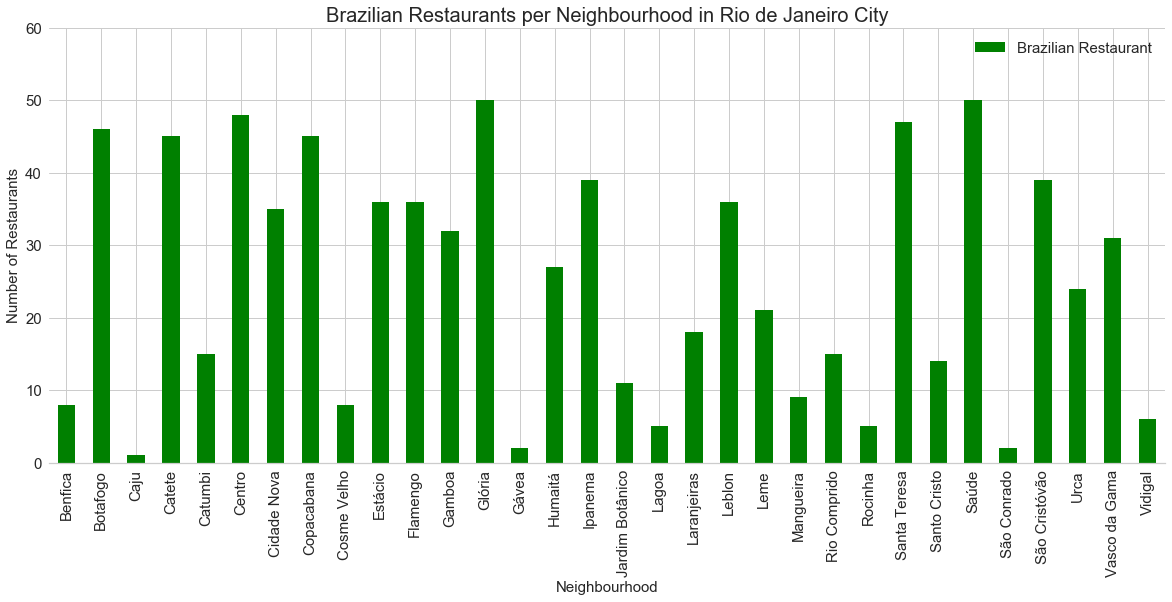

In [134]:
RioCityNeighbourhoodBrazilianRestaurants = RioCityNeighbourhoodVenueGroupedByVenuesNo01.copy()
RioCityNeighbourhoodBrazilianRestaurants.set_index('Neighbourhood', inplace = True)
ax01 = RioCityNeighbourhoodBrazilianRestaurants.plot(kind = 'bar',color = 'green', figsize = (20,8), fontsize = 15, align = 'center')
ax01.set_title('Brazilian Restaurants per Neighbourhood in Rio de Janeiro City', fontsize = 20)
ax01.legend(fontsize = 15)
ax01.set_xlabel('Neighbourhood',fontsize = 15)
ax01.set_ylabel('Number of Restaurants',fontsize =15)
ax01.set_ylim(0,60)
ax01.spines['top'].set_visible(False)
ax01.spines['left'].set_visible(False)
ax01.spines['right'].set_visible(False)
plt.show()

#### 2.4.4 Brazilian Restaurants per Neighbourhood per 1000 habitants <a class = 'anchor' id = 'section_2_4_4'></a>

In [135]:
RioNeighbourhoodBrazilianRestaurantData = pd.merge(RioCityNeighbourhoodBrazilianRestaurants, RioNeighbourhoodPopulationData, on = 'Neighbourhood')
RioNeighbourhoodBrazilianRestaurantData['Brazilian Restaurants per 1000 habitants'] = 1000*(RioNeighbourhoodBrazilianRestaurantData['Brazilian Restaurant']/RioNeighbourhoodBrazilianRestaurantData['Population'])
RioNeighbourhoodBrazilianRestaurantData

Neighbourhood  Brazilian Restaurant  Population  \
0           Benfica                     8       25081   
1          Botafogo                    46       82890   
2              Caju                     1       20477   
3            Catete                    45       24057   
4           Catumbi                    15       12556   
5            Centro                    48       41142   
6       Cidade Nova                    35        5466   
7        Copacabana                    45      146392   
8       Cosme Velho                     8        7178   
9           Estácio                    36       17189   
10         Flamengo                    36       50043   
11           Gamboa                    32       13108   
12           Glória                    50        9661   
13            Gávea                     2       16003   
14          Humaitá                    27       13285   
15          Ipanema                    39       42743   
16  Jardim Botânico                    11       18009   
17            Lagoa                     5       21198   
18      Laranjeiras                    18       45554   
19           Leblon                    36       46044   
20             Leme                    21       14799   
21        Mangueira                     9       17835   
22     Rio Comprido                    15       43764   
23          Rocinha                     5       69356   
24     Santa Teresa                    47       40926   
25     Santo Cristo                    14       12330   
26            Saúde                    50        2749   
27      São Conrado                     2       10980   
28    São Cristóvão                    39       26510   
29             Urca                    24        7061   
30    Vasco da Gama                    31       15482   
31          Vidigal                     6       12797   

    Brazilian Restaurants per 1000 habitants  
0                                   0.318967  
1                                   0.554952  
2                                   0.048835  
3                                   1.870557  
4                                   1.194648  
5                                   1.166691  
6                                   6.403220  
7                                   0.307394  
8                                   1.114517  
9                                   2.094363  
10                                  0.719381  
11                                  2.441257  
12                                  5.175448  
13                                  0.124977  
14                                  2.032367  
15                                  0.912430  
16                                  0.610806  
17                                  0.235871  
18                                  0.395135  
19                                  0.781861  
20                                  1.419015  
21                                  0.504626  
22                                  0.342747  
23                                  0.072092  
24                                  1.148414  
25                                  1.135442  
26                                 18.188432  
27                                  0.182149  
28                                  1.471143  
29                                  3.398952  
30                                  2.002325  
31                                  0.468860

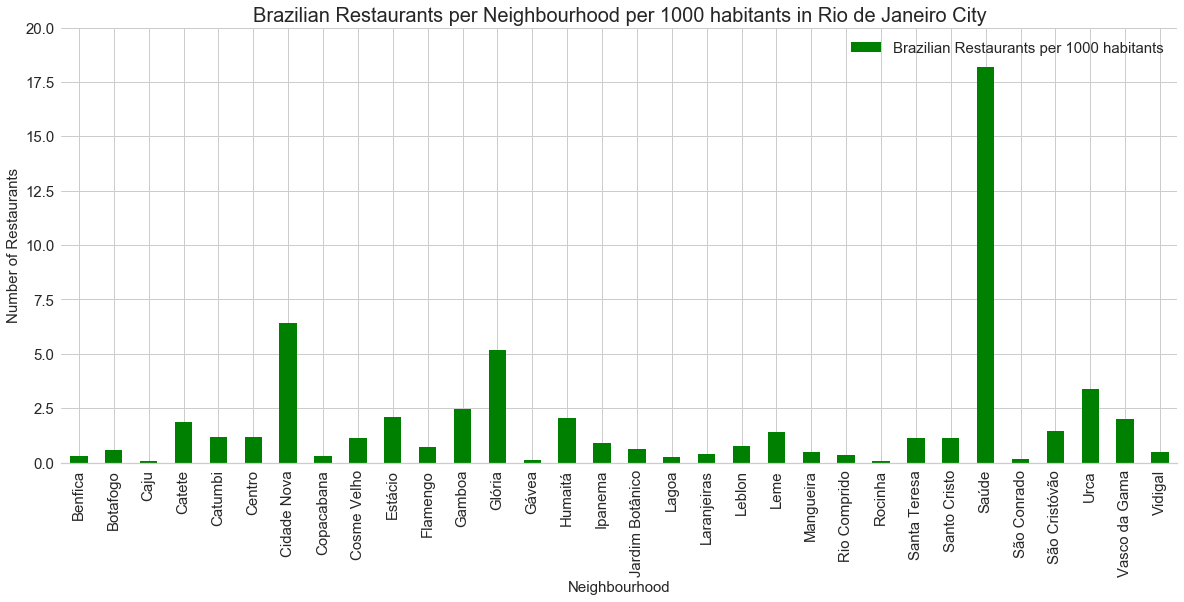

In [136]:
RioNeighbourhoodBrazilianRestaurantDataPerOneThousand = RioNeighbourhoodBrazilianRestaurantData.copy()
RioNeighbourhoodBrazilianRestaurantDataPerOneThousand.drop(columns = ['Brazilian Restaurant', 'Population',], inplace = True)
RioNeighbourhoodBrazilianRestaurantDataPerOneThousand.set_index('Neighbourhood', inplace = True)
ax01 = RioNeighbourhoodBrazilianRestaurantDataPerOneThousand.plot(kind = 'bar',color = 'green', figsize = (20,8), fontsize = 15, align = 'center')
ax01.set_title('Brazilian Restaurants per Neighbourhood per 1000 habitants in Rio de Janeiro City', fontsize = 20)
ax01.legend(fontsize = 15)
ax01.set_xlabel('Neighbourhood',fontsize = 15)
ax01.set_ylabel('Number of Restaurants',fontsize =15)
ax01.set_ylim(0,20)
ax01.spines['top'].set_visible(False)
ax01.spines['left'].set_visible(False)
ax01.spines['right'].set_visible(False)
plt.show()

#### 2.4.5 Brazilian Speciality Restaurants per Neighbourhood <a class = 'anchor' id = 'section_2_4_5'></a>

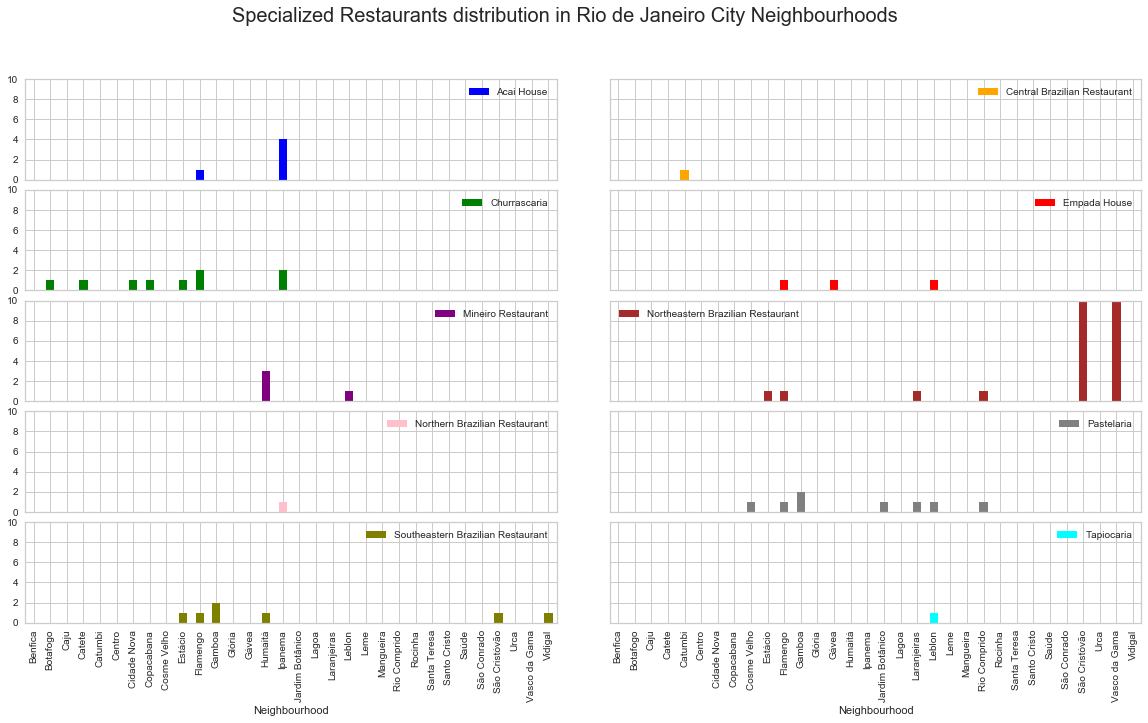

In [137]:
VenuesNo02 = RioCityNeighbourhoodVenueGroupedByVenuesNo02.copy()
VenuesNo02.set_index('Neighbourhood', inplace = True)
VenuesNo03 = RioCityNeighbourhoodVenueGroupedByVenuesNo03.copy()
VenuesNo03.set_index('Neighbourhood', inplace = True)
VenuesNo04 = RioCityNeighbourhoodVenueGroupedByVenuesNo04.copy()
VenuesNo04.set_index('Neighbourhood', inplace = True)
VenuesNo05 = RioCityNeighbourhoodVenueGroupedByVenuesNo05.copy()
VenuesNo05.set_index('Neighbourhood', inplace = True)
VenuesNo06 = RioCityNeighbourhoodVenueGroupedByVenuesNo06.copy()
VenuesNo06.set_index('Neighbourhood', inplace = True)
VenuesNo07 = RioCityNeighbourhoodVenueGroupedByVenuesNo07.copy()
VenuesNo07.set_index('Neighbourhood', inplace = True)
VenuesNo08 = RioCityNeighbourhoodVenueGroupedByVenuesNo08.copy()
VenuesNo08.set_index('Neighbourhood', inplace = True)
VenuesNo09 = RioCityNeighbourhoodVenueGroupedByVenuesNo09.copy()
VenuesNo09.set_index('Neighbourhood', inplace = True)
VenuesNo10 = RioCityNeighbourhoodVenueGroupedByVenuesNo10.copy()
VenuesNo10.set_index('Neighbourhood', inplace = True)
VenuesNo11 = RioCityNeighbourhoodVenueGroupedByVenuesNo11.copy()
VenuesNo11.set_index('Neighbourhood', inplace = True)

Figure = plt.figure(figsize = (20,10))
Figure.suptitle('Specialized Restaurants distribution in Rio de Janeiro City Neighbourhoods', fontsize = 20)
#Figure.ylabel('x')
Figure.subplots_adjust(hspace = 0.1, wspace = 0.1)
for i in range (1,11):
    ax = Figure.add_subplot(5,2,i)
    
ax02 = Figure.add_subplot(5,2,1)
ax03 = Figure.add_subplot(5,2,2)
ax04 = Figure.add_subplot(5,2,3)
ax05 = Figure.add_subplot(5,2,4)
ax06 = Figure.add_subplot(5,2,5)
ax07 = Figure.add_subplot(5,2,6)
ax08 = Figure.add_subplot(5,2,7)
ax09 = Figure.add_subplot(5,2,8)
ax10 = Figure.add_subplot(5,2,9)
ax11 = Figure.add_subplot(5,2,10)
ax.get_shared_x_axes().join(ax02,ax03,ax04,ax05,ax06,ax07,ax08,ax09,ax10,ax11)
ax.get_shared_y_axes().join(ax02,ax03,ax04,ax05,ax06,ax07,ax08,ax09,ax10,ax11)
ax.set_ylim(0,10)

ax02 = VenuesNo02.plot(kind = 'bar', color = 'blue', ax = ax02)
ax03 = VenuesNo03.plot(kind = 'bar', color = 'orange', ax = ax03)
ax04 = VenuesNo04.plot(kind = 'bar', color = 'green', ax = ax04)
ax05 = VenuesNo05.plot(kind = 'bar', color = 'red', ax = ax05)
ax06 = VenuesNo06.plot(kind = 'bar', color = 'purple', ax = ax06)
ax07 = VenuesNo07.plot(kind = 'bar', color = 'brown', ax = ax07)
ax08 = VenuesNo08.plot(kind = 'bar', color = 'pink', ax = ax08)
ax09 = VenuesNo09.plot(kind = 'bar', color = 'gray', ax = ax09)
ax10 = VenuesNo10.plot(kind = 'bar', color = 'olive', ax = ax10)
ax11 = VenuesNo11.plot(kind = 'bar', color = 'cyan', ax = ax11)

plt.show()

In [138]:
#RioMapFeatures1 = RioNeighbourhoodFeatures.copy()
#RioMapFeatures1

In [139]:
RioMapFeatures1 = RioNeighbourhoodFeatures.copy()

In [140]:
RioMapFeatures2 = RioNeighbourhoodFeatures.copy()
RioMapFeatures2 = RioMapFeatures2[(RioMapFeatures2['Borough'] == 'Zona Sul') | (RioMapFeatures2['Borough'] == 'Centro')].reset_index(drop=True)
#RioMapFeatures2

KeyError: 'Borough'

In [135]:
#for feature in RioMapFeatures1['features']['features']:
#    feature['properties']['NOME'] = 'Hej'

In [136]:
# RioMapFeatures['Neighbourhood'] = RioMapFeatures['Neighbourhood'].str.strip()

In [146]:
RioNeighbourhoodMapData = RioNeighbourhoodData.copy()
#RioNeighbourhoodMapData = RioCityNeighbourhoodVenueGroupedByVenuesNo01.copy()
RioNeighbourhoodMapData

Borough      Neighbourhood   Latitude  Longitude  Population
0              Bangu              Bangu -22.858460 -43.485241      243125
1              Bangu  Campo dos Afonsos -22.878415 -43.383256        1365
2              Bangu            Deodoro -22.851337 -43.386390       10842
3              Bangu           Gericinó -22.842993 -43.478667       15167
4              Bangu     Jardim Sulacap -22.895853 -43.393991       13062
..               ...                ...        ...        ...         ...
150         Zona Sul               Urca -22.954304 -43.167570        7061
151           Centro             Centro -22.906912 -43.181889       41142
152           Centro       Santa Teresa -22.916247 -43.191630       40926
153         Zona Sul        São Conrado -22.988417 -43.269444       10980
154  Barra da Tijuca    Barra da Tijuca -23.000323 -43.365821      135924

[155 rows x 5 columns]

In [9]:
BrazilPopulationPerNeighbourhoodDataReduced.rename(columns = {'Boroughairro': 'NeighbourhoodComposed', 'Total': 'Population'}, inplace = True)
BrazilPopulationPerNeighbourhoodDataReduced.head()

NeighbourhoodComposed Population
0            Centro - Alta Floresta D'Oeste (RO)       1960
1         Liberdade - Alta Floresta D'Oeste (RO)       1075
2       Cidade Alta - Alta Floresta D'Oeste (RO)       1175
3  Santa Felicidade - Alta Floresta D'Oeste (RO)       2833
4   Princesa Isabel - Alta Floresta D'Oeste (RO)       3067

In [138]:
RioNeighbourhoodMapData.head(2)

Borough      Neighbourhood   Latitude  Longitude  Population
0   Bangu              Bangu -22.858460 -43.485241      243125
1   Bangu  Campo dos Afonsos -22.878415 -43.383256        1365

In [139]:
RioNeighbourhoodMapData.shape

(155, 5)

In [140]:
#RioMapFeatures = RioNeighbourhoodUrl
RioMapFeatures = RioMapFeatures1
#RioMapFeatures = RioMapFeatures2
threshold_scale = np.linspace(
                              RioNeighbourhoodMapData['Population'].min(),
                              RioNeighbourhoodMapData['Population'].max(),
                              #RioNeighbourhoodMapData['Brazilian Restaurant'].min(),
                              #RioNeighbourhoodMapData['Brazilian Restaurant'].max(),
                              6, dtype = int)
threshold_scale = threshold_scale.tolist()
threshold_scale[-1] = threshold_scale[-1] +1
world_map = folium.Map(location=[RioCityLatitude,RioCityLongitude], zoom_start = 11)
world_map.choropleth(
    geo_data = RioMapFeatures,
    data = RioNeighbourhoodMapData,
    columns = ['Borough','Population'],
    #columns = ['Neighbourhood','Population'],
    #columns = ['Neighbourhood','Brazilian Restaurant'],
    key_on = 'feature.properties.RP',
    #key_on = 'feature.properties.NOME',
    #key_on = 'Neighbourhood',
    threshold_scale = threshold_scale,
    fill_color = 'YlOrRd',
    #fill_color = 'blue',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Population in Rio de Janeiro'
)
world_map